Problem 1 [50%]: Software defects datasets contain information about bugs in software modules (functions). Each dataset represents one software project with multiple modules. There are some datasets that are different releases for the same project. The features in the datasets describe the static code metrics in software modules where the output will be binary variable called defect (1= defected, 0=none-defected).

In [ ]:
!pip install collections

In [ ]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.svm import SVC # search library of svm time smaal
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import pandas as pd
from sklearn.feature_selection  import SelectKBest 
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from collections import Counter
from imblearn import over_sampling ,under_sampling
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

In [ ]:
Data_1= pd.read_csv('ar1.csv')
Data_2= pd.read_csv('ar3.csv')
Data_3= pd.read_csv('ar4.csv')
Data_4= pd.read_csv('ar5.csv')
Data_5= pd.read_csv('ar6.csv')
Data_6= pd.read_csv('cm1.csv')
Data_7= pd.read_csv('pc1.csv')
Data_8= pd.read_csv('pc2.csv')
Data_9= pd.read_csv('pc3.csv')
Data_10= pd.read_csv('pc4.csv')

### QUE 1

In [ ]:
def SVM(Data):
    col = list(Data.columns)[-1]
    x= Data.loc[:, Data.columns != col]
    y= Data.iloc[:,-1]

    #KFold k=10
    folds=KFold(n_splits=10, shuffle=False) #10 Folds CV

    for train_index, test_index in folds.split(x):
      X_train=x.iloc[train_index]
      X_test=x.iloc[test_index]
      y_train=y.iloc[train_index]
      y_test=y.iloc[test_index]
      sc=StandardScaler()
      sc.fit(X_train)
      X_train_std=sc.transform(X_train)
      X_test_std=sc.transform(X_test)
      svm =SVC()#LibSVM()          #NuSVC()#SVC() # not have parameter c
      # Instantiate the GridSearchCV object and run the search
      parameters = {'C':[0.01 ,0.1,1, 10, 100], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],'gamma':[ 0.001, 0.01, 0.1,1,10,100]}
      searcher = GridSearchCV(svm, parameters)
      s = searcher.fit(X_train_std, y_train)
      
      # Report the best parameters and the corresponding score
      # print("Best CV params", searcher.best_params_)
      # print("Best CV accuracy", searcher.best_score_)

      # # Report the test accuracy using these best parameters
    y_hat =s.predict(X_test_std) 
    print(y_hat.shape) 
    #print("Test accuracy of best grid search hypers:", searcher.score(X_test_std, y_test))
    #print("Test accuracy of best grid search hypers:", searcher.score(y_testy_hat, ))

    # summarize results
    print("\n**** Best: %f using %s ****\n" % (s.best_score_, searcher.best_params_))
    # Evaluating the accuracy of the model using the sklearn functions
    accuracy = accuracy_score(y_test,y_hat )*100
    confusion_mat = confusion_matrix(y_test,y_hat )

    # Printing the results
    print("Accuracy for SVM is:",accuracy)


    print( "Classification report for %s" % s)

    print(metrics.classification_report(y_test,y_hat ))

    print( metrics.confusion_matrix(y_test,y_hat ))

In [ ]:
def LogReg(Data): 
    col = list(Data.columns)[-1]
    # x= Data.loc[:, Data.columns != col]
    # y= Data.iloc[:,-1]
    # x=Data.drop([col], axis=1)
    # y=Data_1[col]
    col = list(Data.columns)[-1]
    x= Data.loc[:, Data.columns != col]
    y= Data.iloc[:,-1]
    
    X_train, X_test, y_train, y_test= train_test_split(x,y,test_size=0.3)
    #KFold k=10
    folds=KFold(n_splits=10, shuffle=True) #10 Folds CV
    for train_index, test_index in folds.split(x):
      X_train=x.iloc[train_index]
      X_test=x.iloc[test_index]
      #X_test=x.loc[test_index]
      y_train=y.iloc[train_index]
      y_test=y.iloc[test_index]
      logreg = LogisticRegression()
      # Create the hyperparameter grid
      
      c_space = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
      param_grid = {'C':c_space, 'penalty': ['l1', 'l2','elasticnet', None],'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}
      logreg_cv = GridSearchCV(logreg,param_grid)
      # Fit it to the training data
      l=logreg_cv.fit(X_train,y_train)
 
      # # Report the test accuracy using these best parameters
    y_hat =l.predict(X_test) 
    print(y_hat.shape) 


    # summarize results
    print("\n**** Best: %f using %s ****\n" % (l.best_score_, l.best_params_))
    # Evaluating the accuracy of the model using the sklearn functions
    accuracy = accuracy_score(y_test,y_hat )*100
    confusion_mat = confusion_matrix(y_test,y_hat )

    # Printing the results
    print("Accuracy for SVM is:",accuracy)





    print( "Classification report for %s" % l)

    print(metrics.classification_report(y_test,y_hat ))

    print( metrics.confusion_matrix(y_test,y_hat ))


In [ ]:
Datasets=[Data_2,Data_3,Data_4,Data_5,Data_6,Data_7,Data_8,Data_9,Data_10]
c = 2
for i in Datastes:
 
  print(f"\n Data {c}")
  print("Support Vector Classifier ")
  SVM(i)
  print("Logistic Regression")
  LogReg(i)
  c+=1 


 Data 2
Support Vector Classifier 
(6,)

**** Best: 0.930303 using {'C': 0.01, 'gamma': 0.1, 'kernel': 'poly'} ****

Accuracy for SVM is: 66.66666666666666
Classification report for GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': [0.01, 0.1, 1, 10, 100, 1000],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})
              precision    recall  f1-score   support

       False       0.60      1.00      0.75         3
        True       1.00      0.33      0.50         3

    accuracy                           0.67         6
   macro avg       0.80      0.67      0.62         6
weighted avg       0.80      0.67      0.62         6

[[3 0]
 [2 1]]
Logistic Regression
(6,)

**** Best: 0.898485 using {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'} ****

Accuracy for Logistic is: 100.0
Classification report for GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 

In [ ]:
SVM(Data_1)

In [ ]:
LogReg(Data_1)

(12,)

**** Best: 0.945022 using {'C': 0.001, 'penalty': 'l1', 'solver': 'saga'} ****

Accuracy for SVM is: 75.0
Classification report for GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']})
              precision    recall  f1-score   support

       False       0.75      1.00      0.86         9
        True       0.00      0.00      0.00         3

    accuracy                           0.75        12
   macro avg       0.38      0.50      0.43        12
weighted avg       0.56      0.75      0.64        12

[[9 0]
 [3 0]]


# *Problem 1*

---



In [ ]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.svm import SVC # search library of svm time smaal
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import pandas as pd
from sklearn.feature_selection  import SelectKBest 
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Problem 1 [50%]: Software defects datasets contain information about bugs in software
# modules (functions). Each dataset represents one software project with multiple modules.
# There are some datasets that are different releases for the same project. The features in
# the datasets describe the static code metrics in software modules where the output will
# be binary variable called defect (1= defected, 0=none-defected).

# Que 1

In [ ]:
Data_1= pd.read_csv('ar1.csv')
Data_2= pd.read_csv('ar3.csv')
Data_3= pd.read_csv('ar4.csv')
Data_4= pd.read_csv('ar5.csv')
Data_5= pd.read_csv('ar6.csv')
Data_6= pd.read_csv('cm1.csv')
Data_7= pd.read_csv('pc1.csv')
Data_8= pd.read_csv('pc2.csv')
Data_9= pd.read_csv('pc3.csv')
Data_10= pd.read_csv('pc4.csv')

In [ ]:
col = list(Data_1.columns)[-1]
x= Data_1.loc[:, Data_1.columns != col]
y= Data_1.iloc[:,-1]

In [ ]:
x.shape

(121, 29)

In [ ]:
y.shape

(121,)

In [ ]:
y

0      True
1     False
2     False
3     False
4     False
      ...  
58     True
59    False
60    False
61    False
62     True
Name: defects, Length: 63, dtype: bool

In [ ]:
col = list(Data_1.columns)[-1]
x= Data_1.loc[:, Data_1.columns != col]
x

,total_loc,blank_loc,comment_loc,code_and_comment_loc,executable_loc,unique_operands,unique_operators,total_operands,total_operators,halstead_vocabulary,...,call_pairs,condition_count,multiple_condition_count,cyclomatic_complexity,cyclomatic_density,decision_density,design_complexity,design_density,normalized_cyclomatic_complexity,formal_parameters
0,7,0,4,0,3,8,6,10,12,14,...,0,0,0,1,0.33,0.00,0,0.00,0.14,0
1,9,0,1,0,8,7,8,15,20,15,...,0,0,0,2,0.25,0.00,0,0.00,0.22,0
2,21,0,14,1,7,15,12,21,36,27,...,1,4,1,4,0.57,1.00,1,0.25,0.19,0
3,30,0,11,0,19,16,18,50,70,34,...,1,9,2,9,0.47,1.11,1,0.11,0.30,0
4,8,0,2,0,6,4,5,5,10,9,...,1,1,0,2,0.33,1.00,1,0.50,0.25,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,32,0,5,0,27,16,11,33,56,27,...,0,9,1,8,0.30,1.00,0,0.00,0.25,0
117,6,0,0,0,6,3,5,5,11,8,...,0,2,0,3,0.50,1.00,0,0.00,0.50,0
118,6,0,0,0,6,6,6,6,11,12,...,1,2,1,2,0.33,1.00,1,0.50,0.33,0
119,27,0,3,0,24,16,9,26,44,25,...,1,8,3,6,0.25,1.00,1,0.17,0.22,0


In [ ]:
# Evaluate the performance of Support Vector Classifier and Logistic Regression, using
# 10-Folds cross validation on each single dataset? Describe the best parameters for both
# algorithms and what is the impact of other parameters? Do all datasets share the same
# configuration settings?

In [ ]:
# Paramerter C:

# Large Value of parameter C => small margin

# Small Value of paramerter C => Large margin

# Gamma:

# Gamma high means more curvature.

# Gamma low means less curvature

## Data 1

### Preprocessing data

In [ ]:
Data_1.shape

(121, 30)

In [ ]:
print("Feature \t Null Count")
Data_1.isnull().sum()

Feature 	 Null Count


total_loc                           0
blank_loc                           0
comment_loc                         0
code_and_comment_loc                0
executable_loc                      0
unique_operands                     0
unique_operators                    0
total_operands                      0
total_operators                     0
halstead_vocabulary                 0
halstead_length                     0
halstead_volume                     0
halstead_level                      0
halstead_difficulty                 0
halstead_effort                     0
halstead_error                      0
halstead_time                       0
branch_count                        0
decision_count                      0
call_pairs                          0
condition_count                     0
multiple_condition_count            0
cyclomatic_complexity               0
cyclomatic_density                  0
decision_density                    0
design_complexity                   0
design_densi

In [ ]:
print("Feature \t    Is NaN?")
Data_1.isna().any()

Feature 	    Is NaN?


total_loc                           False
blank_loc                           False
comment_loc                         False
code_and_comment_loc                False
executable_loc                      False
unique_operands                     False
unique_operators                    False
total_operands                      False
total_operators                     False
halstead_vocabulary                 False
halstead_length                     False
halstead_volume                     False
halstead_level                      False
halstead_difficulty                 False
halstead_effort                     False
halstead_error                      False
halstead_time                       False
branch_count                        False
decision_count                      False
call_pairs                          False
condition_count                     False
multiple_condition_count            False
cyclomatic_complexity               False
cyclomatic_density                

In [ ]:
Data_1.describe()

,total_loc,blank_loc,comment_loc,code_and_comment_loc,executable_loc,unique_operands,unique_operators,total_operands,total_operators,halstead_vocabulary,...,call_pairs,condition_count,multiple_condition_count,cyclomatic_complexity,cyclomatic_density,decision_density,design_complexity,design_density,normalized_cyclomatic_complexity,formal_parameters
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,...,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000
mean,20.388430,0.206612,4.760331,0.074380,15.421488,12.454545,8.330579,23.743802,36.876033,20.785124,...,2.239669,4.396694,0.991736,4.570248,0.312479,0.683140,2.239669,0.681818,0.253554,0.330579
std,19.601178,1.040171,6.114225,0.293408,15.262018,10.000000,4.156097,24.096863,36.343631,13.453133,...,3.413270,6.527480,1.604659,4.857685,0.103773,0.581892,3.413270,1.205867,0.104018,0.568454
min,2.000000,0.000000,0.000000,0.000000,2.000000,1.000000,2.000000,1.000000,3.000000,3.000000,...,0.000000,0.000000,0.000000,1.000000,0.130000,0.000000,0.000000,0.000000,0.030000,0.000000
25%,6.000000,0.000000,0.000000,0.000000,5.000000,5.000000,5.000000,6.000000,11.000000,10.000000,...,0.000000,0.000000,0.000000,1.000000,0.250000,0.000000,0.000000,0.000000,0.170000,0.000000
50%,12.000000,0.000000,3.000000,0.000000,8.000000,9.000000,8.000000,16.000000,25.000000,18.000000,...,1.000000,2.000000,1.000000,3.000000,0.300000,1.000000,1.000000,0.170000,0.250000,0.000000
75%,32.000000,0.000000,7.000000,0.000000,23.000000,17.000000,11.000000,35.000000,56.000000,28.000000,...,3.000000,8.000000,1.000000,6.000000,0.330000,1.000000,3.000000,0.670000,0.330000,1.000000
max,95.000000,9.000000,30.000000,2.000000,82.000000,47.000000,19.000000,118.000000,184.000000,62.000000,...,19.000000,38.000000,10.000000,28.000000,0.600000,2.000000,19.000000,6.000000,0.500000,3.000000


In [ ]:
Data_1

,total_loc,blank_loc,comment_loc,code_and_comment_loc,executable_loc,unique_operands,unique_operators,total_operands,total_operators,halstead_vocabulary,...,condition_count,multiple_condition_count,cyclomatic_complexity,cyclomatic_density,decision_density,design_complexity,design_density,normalized_cyclomatic_complexity,formal_parameters,defects
0,7,0,4,0,3,8,6,10,12,14,...,0,0,1,0.33,0.00,0,0.00,0.14,0,False
1,9,0,1,0,8,7,8,15,20,15,...,0,0,2,0.25,0.00,0,0.00,0.22,0,False
2,21,0,14,1,7,15,12,21,36,27,...,4,1,4,0.57,1.00,1,0.25,0.19,0,False
3,30,0,11,0,19,16,18,50,70,34,...,9,2,9,0.47,1.11,1,0.11,0.30,0,True
4,8,0,2,0,6,4,5,5,10,9,...,1,0,2,0.33,1.00,1,0.50,0.25,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,32,0,5,0,27,16,11,33,56,27,...,9,1,8,0.30,1.00,0,0.00,0.25,0,False
117,6,0,0,0,6,3,5,5,11,8,...,2,0,3,0.50,1.00,0,0.00,0.50,0,False
118,6,0,0,0,6,6,6,6,11,12,...,2,1,2,0.33,1.00,1,0.50,0.33,0,False
119,27,0,3,0,24,16,9,26,44,25,...,8,3,6,0.25,1.00,1,0.17,0.22,0,False


### SVM

#### test library

In [ ]:
!pip install -U libsvm-official

In [ ]:
! pip3 install libsvm

In [ ]:
from libsvm import svmutil

In [ ]:
from sklearn.svm import NuSVC

In [ ]:
from sklearn.svm import NuSVR

In [ ]:
from sklearn.svm import SVR


In [ ]:
from sklearn.svm import SVC     

In [ ]:
! pip install mlpack==3.4.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 MB 6.5 MB/s eta 0:00:00
  Attempting uninstall: mlpack
    Found existing installation: mlpack 4.0.1
    Uninstalling mlpack-4.0.1:
      Successfully uninstalled mlpack-4.0.1


In [ ]:
from shogun import LibSVM


ImportError: ignored

In [ ]:
import sklearn.model_selection as ms
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(Data_1)
Data_1 = scaler.transform(Data_1)



In [ ]:
x=Data_1.drop(['defects'], axis=1)
y=Data_1['defects']
X_train, X_test, y_train, y_test= train_test_split(x,y,test_size=0.3)
# Instantiate an RBF SVM
svm = NuSVC()#SVC()

# Instantiate the GridSearchCV object and run the search
#param={'C':[1, 10, 100, 1000], 'k

#kernel': ['linear', 'poly', 'rbf', 'sigmoid'],'gamma': [0.001, 0.0001] }# when choose kernal they need a lot of time
parameters = {'C':[0.01 ,0.1,1, 10, 100],'kernel': ['rbf'],'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1]}
searcher = GridSearchCV(svm, parameters)
searcher.fit(X_train, y_train)

# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)

# Report the test accuracy using these best parameters
print("Test accuracy of best grid search hypers:", searcher.score(X_test, y_test))



SyntaxError: ignored

In [ ]:
# #Hold Out Validation
# x=Data_1.drop(['defects'], axis=1)
# y=Data_1['defects']
# X_train, X_test, y_train, y_test= train_test_split(x,y,test_size=0.3)
# # SVM Classifier model
# svm_clf = SVC(kernel="linear", C=float("inf"))
# svm_clf.fit(X_train, y_train)


SVC(C=inf, kernel='linear')

In [ ]:
# There are several libraries that you can use to implement support vector machines (SVMs) with a kernel other than scikit-learn. Some examples include:

# LIBSVM: A library for support vector machines that provides a C++ implementation of various SVM algorithms.
# pySVM: A Python library for support vector machines that is built on top of LIBSVM.
# Shogun: A machine learning toolbox that provides an efficient implementation of SVMs and other machine learning algorithms.
# mlpack: A fast, flexible machine learning library that includes an implementation of SVMs.
# Each of these libraries has its own strengths and weaknesses, and you should choose the one that best meets your needs.

In [ ]:
! pip install mlpack

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.4/37.4 MB 10.3 MB/s eta 0:00:00


In [ ]:
! pip uninstall numpy



Found existing installation: numpy 1.24.1
Uninstalling numpy-1.24.1:
  Would remove:
    /usr/local/bin/f2py
    /usr/local/bin/f2py3
    /usr/local/bin/f2py3.8
    /usr/local/lib/python3.8/dist-packages/numpy-1.24.1.dist-info/*
    /usr/local/lib/python3.8/dist-packages/numpy.libs/libgfortran-040039e1.so.5.0.0
    /usr/local/lib/python3.8/dist-packages/numpy.libs/libopenblas64_p-r0-15028c96.3.21.so
    /usr/local/lib/python3.8/dist-packages/numpy.libs/libquadmath-96973f99.so.0.0.0
    /usr/local/lib/python3.8/dist-packages/numpy/*
Proceed (Y/n)? y
  Successfully uninstalled numpy-1.24.1


In [ ]:

! pip install numpy==1.16.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 35.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for numpy: filename=numpy-1.16.5-cp38-cp38-linux_x86_64.whl size=8261397 sha256=3d700a1a1c3e16fe5ca87cc953e9d1266cf000e19edddfd20eaa25b6886976a2
  Stored in directory: /root/.cache/pip/wheels/8f/3f/d3/ac786baa3379136ed1069cf94478550de71616e0490b462e90
Successfully built numpy
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray 2022.12.0 requires numpy>=1.20, but you have numpy 1.16.5 which is incompatible.
xarray-einstats 0.4.0 requires numpy>=1.20, but you have numpy 1.16.5 which is incompatible.
tifffile 2022.10.10 requires numpy>=1.19.2, but you have numpy 1.16.5 which is incompatible.
tensorflow 2.9.2 requires numpy>=1.20, 

In [ ]:
pip install mlpack==3.0.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement mlpack==3.0.2 (from versions: 3.2.2, 3.3.0, 3.3.1, 3.3.2, 3.4.1, 3.4.2, 4.0.0, 4.0.0.post1, 4.0.1)
ERROR: No matching distribution found for mlpack==3.0.2


In [ ]:
! pip install mlpack

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numpy-1.24.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.16.5
    Uninstalling numpy-1.16.5:
      Successfully uninstalled numpy-1.16.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scipy 1.7.3 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.24.1 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.1 which is incompatible.


In [ ]:
pip install numpy==1.16.6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 40.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for numpy: filename=numpy-1.16.6-cp38-cp38-linux_x86_64.whl size=8269415 sha256=ce89c83ce954e035b8f4a6c1e7187746a688e819e9c5c4a06e807739d5004df5
  Stored in directory: /root/.cache/pip/wheels/22/6f/a6/069db0c95f9bb6b73e07da014891c58460fef1eb84f49576f0
Successfully built numpy
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.1
    Uninstalling numpy-1.24.1:
      Successfully uninstalled numpy-1.24.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray 2022.12.0 requires numpy>=1.20, but you have numpy 1.16.6 which is incompatible.
xarray-einstats 0.4.0 requires numpy>=1.20, but you have numpy 1.16.6 whic

In [ ]:
! pip install numpy==1.16.6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import mlpack

ValueError: ignored

In [ ]:
! pip install numpy==1.20.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.4/15.4 MB 63.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.1
    Uninstalling numpy-1.24.1:
      Successfully uninstalled numpy-1.24.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cmdstanpy 1.0.8 requires numpy>=1.21, but you have numpy 1.20.3 which is incompatible.


In [ ]:
! pip install mlpack

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import mlpack 

ValueError: ignored

In [ ]:
! pip uninstall numpy mlpack
! pip install numpy mlpack

Found existing installation: numpy 1.20.3
Uninstalling numpy-1.20.3:
  Would remove:
    /usr/local/bin/f2py
    /usr/local/bin/f2py3
    /usr/local/bin/f2py3.8
    /usr/local/lib/python3.8/dist-packages/numpy-1.20.3.dist-info/*
    /usr/local/lib/python3.8/dist-packages/numpy.libs/libgfortran-2e0d59d6.so.5.0.0
    /usr/local/lib/python3.8/dist-packages/numpy.libs/libopenblasp-r0-5bebc122.3.13.dev.so
    /usr/local/lib/python3.8/dist-packages/numpy.libs/libquadmath-2d0c479f.so.0.0.0
    /usr/local/lib/python3.8/dist-packages/numpy.libs/libz-eb09ad1d.so.1.2.3
    /usr/local/lib/python3.8/dist-packages/numpy/*
Proceed (Y/n)? y
  Successfully uninstalled numpy-1.20.3
Found existing installation: mlpack 3.2.2
Uninstalling mlpack-3.2.2:
  Would remove:
    /usr/local/lib/python3.8/dist-packages/mlpack-3.2.2.dist-info/*
    /usr/local/lib/python3.8/dist-packages/mlpack/*
Proceed (Y/n)? y
  Successfully uninstalled mlpack-3.2.2
Looking in indexes: https://pypi.org/simple, https://us-python.pk

In [ ]:

! pip install mlpack=3.4.2

ERROR: Invalid requirement: 'mlpack=3.4.2'
Hint: = is not a valid operator. Did you mean == ?


In [ ]:
! pip --version

pip 22.0.4 from /usr/local/lib/python3.8/dist-packages/pip (python 3.8)


In [ ]:
! python -m ensurepip --upgrade

/usr/bin/python3: No module named ensurepip


In [ ]:
! pip install shogun == 6.1.0

ERROR: Invalid requirement: '=='


In [ ]:
from shogun import (LibSVMFile, SparseRealFeatures, MulticlassLabels,MulticlassLibSVM, SerializableHdf5File,MulticlassAccuracy)

ImportError: ignored

In [ ]:
! pip install shogun==0.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for shogun: filename=shogun-0.0.1-py3-none-any.whl size=20828 sha256=264dc63d559bd45e42091d9eb109046015b366551a204e2289ea26a354129614
  Stored in directory: /root/.cache/pip/wheels/22/fe/6d/b4313c29fdf10d28169934550ea7526dc39e256a0057024334
Successfully built shogun
  Attempting uninstall: shogun
    Found existing installation: shogun 0.0.2
    Uninstalling shogun-0.0.2:
      Successfully uninstalled shogun-0.0.2


In [ ]:
! pip freeze | grep shogun

shogun==0.0.2


In [ ]:
from shogun.Classifier import LibSVM

ModuleNotFoundError: ignored

In [ ]:
! pip install shogun

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from shogun.Classifier import LibSVM

ModuleNotFoundError: ignored

#### SVM

In [ ]:

# from sklearn.preprocessing import StandardScaler
 

# st= StandardScaler()
 

# # standardization 
# scale = st.fit_transform(Data_1) 
# print(scale)
# Data_1=scale

In [ ]:
# x= Data_1[:, 0:29]
# y= Data_1[:,29]


In [ ]:
x= Data_1.iloc[:, 0:29]
y= Data_1.iloc[:,29]

In [ ]:
x.shape

(121, 29)

In [ ]:
y.shape

(121,)

In [ ]:

x= Data_1.iloc[:, 0:29]
y= Data_1.iloc[:,29]


#KFold k=10
folds=KFold(n_splits=10, shuffle=True) #10 Folds CV
for train_index, test_index in folds.split(x):
  X_train=x.iloc[train_index]
  X_test=x.iloc[test_index]
  y_train=y.iloc[train_index]
  y_test=y.iloc[test_index]
  sc=StandardScaler()
  sc.fit(X_train)
  X_train_std=sc.transform(X_train)
  X_test_std=sc.transform(X_test)
  svm =SVC()#LibSVM()          #NuSVC()#SVC() # not have parameter c
  # Instantiate the GridSearchCV object and run the search
  parameters = {'C':[0.01 ,0.1,1, 10, 100], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],'gamma':[ 0.001, 0.01, 0.1,1,10,100]}
  searcher = GridSearchCV(svm, parameters)
  searcher.fit(X_train_std, y_train)

  # Report the best parameters and the corresponding score
  print("Best CV params", searcher.best_params_)
  print("Best CV accuracy", searcher.best_score_)

  # Report the test accuracy using these best parameters
  print("Test accuracy of best grid search hypers:", searcher.score(X_test_std, y_test))

print("Test accuracy of best grid search hypers:", searcher.score(X_test_std, y_test))

Best CV params {'C': 10, 'gamma': 0.01, 'kernel': 'sigmoid'}
Best CV accuracy 0.945021645021645
Test accuracy of best grid search hypers: 0.8461538461538461
Best CV params {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best CV accuracy 0.945021645021645
Test accuracy of best grid search hypers: 0.8333333333333334
Best CV params {'C': 0.01, 'gamma': 0.001, 'kernel': 'linear'}
Best CV accuracy 0.9268398268398268
Test accuracy of best grid search hypers: 0.9166666666666666
Best CV params {'C': 10, 'gamma': 0.01, 'kernel': 'sigmoid'}
Best CV accuracy 0.9359307359307361
Test accuracy of best grid search hypers: 0.9166666666666666
Best CV params {'C': 0.01, 'gamma': 0.001, 'kernel': 'linear'}
Best CV accuracy 0.9177489177489176
Test accuracy of best grid search hypers: 1.0
Best CV params {'C': 1, 'gamma': 0.01, 'kernel': 'poly'}
Best CV accuracy 0.9359307359307361
Test accuracy of best grid search hypers: 0.8333333333333334
Best CV params {'C': 0.01, 'gamma': 0.001, 'kernel': 'linear'}
Best CV acc

In [ ]:
#KFold k=10
folds=KFold(n_splits=10, shuffle=True) #10 Folds CV
for train_index, test_index in folds.split(x):
  X_train=x.loc[train_index]
  X_test=x.loc[test_index]
  y_train=y[train_index]
  y_test=y[test_index]
  svm = SVC()
  # Instantiate the GridSearchCV object and run the search
  parameters = {'C':[0.01 ,0.1,1, 10, 100]} # 'kernel':['rbf'],'gamma':[ 0.001, 0.01, 0.1,1,10,100]
  searcher = GridSearchCV(svm, parameters)
  searcher.fit(X_train, y_train)

  # Report the best parameters and the corresponding score
  print("Best CV params", searcher.best_params_)
  print("Best CV accuracy", searcher.best_score_)

  # Report the test accuracy using these best parameters
  print("Test accuracy of best grid search hypers:", searcher.score(X_test, y_test))





#when gamma =0.001 accurcy reduced



Best CV params {'C': 0.01}
Best CV accuracy 0.9264069264069263
Test accuracy of best grid search hypers: 0.9230769230769231
Best CV params {'C': 0.01}
Best CV accuracy 0.9268398268398268
Test accuracy of best grid search hypers: 0.9166666666666666
Best CV params {'C': 0.01}
Best CV accuracy 0.9177489177489176
Test accuracy of best grid search hypers: 1.0
Best CV params {'C': 0.01}
Best CV accuracy 0.9177489177489176
Test accuracy of best grid search hypers: 1.0
Best CV params {'C': 0.01}
Best CV accuracy 0.9177489177489176
Test accuracy of best grid search hypers: 1.0
Best CV params {'C': 0.01}
Best CV accuracy 0.9268398268398268
Test accuracy of best grid search hypers: 0.9166666666666666
Best CV params {'C': 0.01}
Best CV accuracy 0.9177489177489176
Test accuracy of best grid search hypers: 1.0
Best CV params {'C': 0.01}
Best CV accuracy 0.9268398268398268
Test accuracy of best grid search hypers: 0.9166666666666666
Best CV params {'C': 0.01}
Best CV accuracy 0.945021645021645
Test a

In [ ]:
#KFold k=10
folds=KFold(n_splits=10, shuffle=True) #10 Folds CV
CList=[0.01 ,0.1,1, 10, 100]
for i in CList:
  for train_index, test_index in folds.split(x):
    X_train=x.loc[train_index]
    X_test=x.loc[test_index]
    y_train=y[train_index]
    y_test=y[test_index]
  
    svm = SVC(C=i)
    svm.fit(X_train, y_train)
    # Using the model to predict the labels of the test data
    y_pred = svm.predict(X_test)

    # Evaluating the accuracy of the model using the sklearn functions
    accuracy = accuracy_score(y_test,y_pred)*100
    print("when c =",i, "accuracy",accuracy)










when c = 0.01 accuracy 84.61538461538461
when c = 0.01 accuracy 100.0
when c = 0.01 accuracy 100.0
when c = 0.01 accuracy 100.0
when c = 0.01 accuracy 100.0
when c = 0.01 accuracy 100.0
when c = 0.01 accuracy 83.33333333333334
when c = 0.01 accuracy 100.0
when c = 0.01 accuracy 91.66666666666666
when c = 0.01 accuracy 66.66666666666666
when c = 0.1 accuracy 84.61538461538461
when c = 0.1 accuracy 100.0
when c = 0.1 accuracy 91.66666666666666
when c = 0.1 accuracy 91.66666666666666
when c = 0.1 accuracy 91.66666666666666
when c = 0.1 accuracy 100.0
when c = 0.1 accuracy 91.66666666666666
when c = 0.1 accuracy 100.0
when c = 0.1 accuracy 83.33333333333334
when c = 0.1 accuracy 91.66666666666666
when c = 1 accuracy 92.3076923076923
when c = 1 accuracy 75.0
when c = 1 accuracy 100.0
when c = 1 accuracy 100.0
when c = 1 accuracy 91.66666666666666
when c = 1 accuracy 75.0
when c = 1 accuracy 100.0
when c = 1 accuracy 91.66666666666666
when c = 1 accuracy 100.0
when c = 1 accuracy 91.66666666

In [ ]:
#c = 1 and gamma = 0.0001 

In [ ]:
# #KFold k=10

 
# from sklearn.model_selection import GridSearchCV
# folds=KFold(n_splits=10, shuffle=True) #10 Folds CV
# #folds=LeaveOneOut()
# result=pd.DataFrame(columns=['actual', 'predictions'])
# y_pred=np.array([])
# y_actual=np.array([])
# for train_index, test_index in folds.split(x):
#   X_train=x.loc[train_index]
#   X_test=x.loc[test_index]
#   y_train=y[train_index]
#   y_test=y[test_index]
#   param={'penalty':['l1', 'l2', 'elasticnet'],'fit_intercept':[True, False],'C':[0.1,10,100]}
#   clf=GridSearchCV(LogisticRegression,param)
#   clf.fit(X_train,y_train)
#   y_hat=clf.predict(X_test)
#   y_pred=np.append(y_pred,y_hat)
#   y_actual=np.append(y_actual,y_test)
#   print('This iteration resulted: ', str(mean_absolute_error(y_test,y_hat)))

# result['actual']=y_actual
# result['predictions']=y_pred 

# mae=mean_absolute_error(y_actual, y_pred)
# mse=mean_squared_error(y_actual, y_pred) 
# print(f'mae= {mae} and mse={mse}') 
# print(result)  
# #print(train_index)
# #print(test_index)#print('----------------')




In [ ]:
# # manual nested cross-validation for random forest on a classification dataset
# from numpy import mean
# from numpy import std
# from sklearn.datasets import make_classification
# from sklearn.model_selection import KFold
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score
# # create dataset
# X, y = make_classification(n_samples=1000, n_features=20, random_state=1, n_informative=10, n_redundant=10)
# # configure the cross-validation procedure
# cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)
# # enumerate splits
# outer_results = list()
# for train_ix, test_ix in cv_outer.split(X):
# 	# split data
# 	X_train, X_test = X[train_ix, :], X[test_ix, :]
# 	y_train, y_test = y[train_ix], y[test_ix]
# 	# configure the cross-validation procedure
# 	cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)
# 	# define the model
# 	model = RandomForestClassifier(random_state=1)
# 	# define search space
# 	space = dict()
# 	space['n_estimators'] = [10, 100, 500]
# 	space['max_features'] = [2, 4, 6]
# 	# define search
# 	search = GridSearchCV(model, space, scoring='accuracy', cv=cv_inner, refit=True)
# 	# execute search
# 	result = search.fit(X_train, y_train)
# 	# get the best performing model fit on the whole training set
# 	best_model = result.best_estimator_
# 	# evaluate model on the hold out dataset
# 	yhat = best_model.predict(X_test)
# 	# evaluate the model
# 	acc = accuracy_score(y_test, yhat)
# 	# store the result
# 	outer_results.append(acc)
# 	# report progress
# 	print('>acc=%.3f, est=%.3f, cfg=%s' % (acc, result.best_score_, result.best_params_))
# # summarize the estimated performance of the model
# print('Accuracy: %.3f (%.3f)' % (mean(outer_results), std(outer_results)))

### Logistic Regression

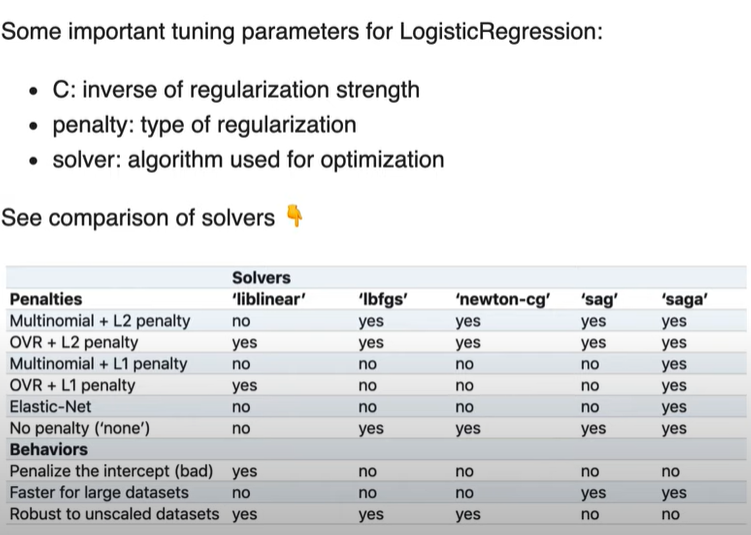

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(Data_1))
StandardScaler()
print(scaler.mean_)
print(scaler.transform(Data_1))
Data_1=scaler

StandardScaler()
[2.03884298e+01 2.06611570e-01 4.76033058e+00 7.43801653e-02
 1.54214876e+01 1.24545455e+01 8.33057851e+00 2.37438017e+01
 3.68760331e+01 2.07851240e+01 6.06198347e+01 2.05132231e+02
 2.57603306e-01 7.79801653e+00 2.86179636e+03 6.83471074e-02
 1.58988264e+02 9.60330579e+00 4.80165289e+00 2.23966942e+00
 4.39669421e+00 9.91735537e-01 4.57024793e+00 3.12479339e-01
 6.83140496e-01 2.23966942e+00 6.81818182e-01 2.53553719e-01
 3.30578512e-01 7.43801653e-02]
[[-0.68588219 -0.19945821 -0.12487144 ... -1.09621185 -0.58395716
  -0.28347335]
 [-0.58342324 -0.19945821 -0.61757069 ... -0.32391704 -0.58395716
  -0.28347335]
 [ 0.03133042 -0.19945821  1.51745941 ... -0.61352759 -0.58395716
  -0.28347335]
 ...
 [-0.73711166 -0.19945821 -0.78180378 ...  0.73798833 -0.58395716
  -0.28347335]
 [ 0.33870725 -0.19945821 -0.28910452 ... -0.32391704 -0.58395716
  -0.28347335]
 [ 1.56821458  1.73129726  1.18899324 ...  0.15876722  1.18251325
   3.52766841]]


In [ ]:
x= Data_1.iloc[:, 0:29]
y= Data_1.iloc[:,29]
# x=Data_1.drop(['defects'], axis=1)
# y=Data_1['defects']
X_train, X_test, y_train, y_test= train_test_split(x,y,test_size=0.3)
#KFold k=10
folds=KFold(n_splits=10, shuffle=True) #10 Folds CV
for train_index, test_index in folds.split(x):
  X_train=x.iloc[train_index]
  X_test=x.iloc[test_index]
  #X_test=x.loc[test_index]
  y_train=y.iloc[train_index]
  y_test=y.iloc[test_index]
  logreg = LogisticRegression()
  # Create the hyperparameter grid
  
  c_space = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
  param_grid = {'C':c_space, 'penalty': ['l1', 'l2','elasticnet', None],'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}
  logreg_cv = GridSearchCV(logreg,param_grid)
  # Fit it to the training data
  logreg_cv.fit(X_train,y_train)

  # Print the optimal parameters and best score
  print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
  print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))

  # Report the test accuracy using these best parameters
  print("Test accuracy of best grid search hypers:", logreg_cv.score(X_test, y_test))









Tuned Logistic Regression Parameter: {'C': 0.001, 'penalty': 'l1', 'solver': 'saga'}
Tuned Logistic Regression Accuracy: 0.9354978354978355
Test accuracy of best grid search hypers: 0.8461538461538461
Tuned Logistic Regression Parameter: {'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}
Tuned Logistic Regression Accuracy: 0.9268398268398268
Test accuracy of best grid search hypers: 0.9166666666666666
Tuned Logistic Regression Parameter: {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
Tuned Logistic Regression Accuracy: 0.9359307359307361
Test accuracy of best grid search hypers: 0.8333333333333334
Tuned Logistic Regression Parameter: {'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}
Tuned Logistic Regression Accuracy: 0.9268398268398268
Test accuracy of best grid search hypers: 0.9166666666666666
Tuned Logistic Regression Parameter: {'C': 0.001, 'penalty': 'l1', 'solver': 'saga'}
Tuned Logistic Regression Accuracy: 0.9268398268398268
Test accuracy of best grid search hypers:

In [ ]:
print( "Classification report for %s" % logreg_cv)

print(metrics.classification_report(y_test, y_pred))

print( metrics.confusion_matrix(y_test, y_pred))

In [ ]:
# Import necessary modules
  


x= Data_1.iloc[:, 0:29]
y= Data_1.iloc[:,29]
#x=Data_1.drop(['defects'], axis=1)
#y=Data_1['defects']
X_train, X_test, y_train, y_test= train_test_split(x,y,test_size=0.3)
#KFold k=10
folds=KFold(n_splits=10, shuffle=True) #10 Folds CV
for train_index, test_index in folds.split(x):
  X_train=x.iloc[train_index]
  X_test=x.iloc[test_index]
  #X_test=x.loc[test_index]
  y_train=y.iloc[train_index]
  y_test=y.iloc[test_index]
  logreg = LogisticRegression()
  # Create the hyperparameter grid
  c_space = [0.001, 0.01, 0.1, 1, 10]
  param_grid = {'C':c_space, 'penalty': ['l1', 'l2']}
  logreg_cv = GridSearchCV(logreg,param_grid)
  # Fit it to the training data
  logreg_cv.fit(X_train,y_train)

  # Print the optimal parameters and best score
  print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
  print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))

  # Report the test accuracy using these best parameters
  print("Test accuracy of best grid search hypers:", logreg_cv.score(X_test, y_test))









Tuned Logistic Regression Parameter: {'C': 0.001, 'penalty': 'l2'}
Tuned Logistic Regression Accuracy: 0.9173160173160173
Test accuracy of best grid search hypers: 0.9230769230769231
Tuned Logistic Regression Parameter: {'C': 0.001, 'penalty': 'l2'}
Tuned Logistic Regression Accuracy: 0.8991341991341992
Test accuracy of best grid search hypers: 1.0
Tuned Logistic Regression Parameter: {'C': 0.001, 'penalty': 'l2'}
Tuned Logistic Regression Accuracy: 0.880952380952381
Test accuracy of best grid search hypers: 0.9166666666666666
Tuned Logistic Regression Parameter: {'C': 0.001, 'penalty': 'l2'}
Tuned Logistic Regression Accuracy: 0.9082251082251082
Test accuracy of best grid search hypers: 1.0
Tuned Logistic Regression Parameter: {'C': 0.001, 'penalty': 'l2'}
Tuned Logistic Regression Accuracy: 0.9177489177489179
Test accuracy of best grid search hypers: 0.9166666666666666
Tuned Logistic Regression Parameter: {'C': 0.001, 'penalty': 'l2'}
Tuned Logistic Regression Accuracy: 0.91731601731

## Data 2

### Preprocessing data

In [ ]:
Data_2.shape

(63, 30)

In [ ]:
print("Feature \t Null Count")
Data_2.isnull().sum()

Feature 	 Null Count


total_loc                           0
blank_loc                           0
comment_loc                         0
code_and_comment_loc                0
executable_loc                      0
unique_operands                     0
unique_operators                    0
total_operands                      0
total_operators                     0
halstead_vocabulary                 0
halstead_length                     0
halstead_volume                     0
halstead_level                      0
halstead_difficulty                 0
halstead_effort                     0
halstead_error                      0
halstead_time                       0
branch_count                        0
decision_count                      0
call_pairs                          0
condition_count                     0
multiple_condition_count            0
cyclomatic_complexity               0
cyclomatic_density                  0
decision_density                    0
design_complexity                   0
design_densi

In [ ]:
print("Feature \t    Is NaN?")
Data_2.isna().any()

Feature 	    Is NaN?


total_loc                           False
blank_loc                           False
comment_loc                         False
code_and_comment_loc                False
executable_loc                      False
unique_operands                     False
unique_operators                    False
total_operands                      False
total_operators                     False
halstead_vocabulary                 False
halstead_length                     False
halstead_volume                     False
halstead_level                      False
halstead_difficulty                 False
halstead_effort                     False
halstead_error                      False
halstead_time                       False
branch_count                        False
decision_count                      False
call_pairs                          False
condition_count                     False
multiple_condition_count            False
cyclomatic_complexity               False
cyclomatic_density                

In [ ]:
Data_2.describe()

,total_loc,blank_loc,comment_loc,code_and_comment_loc,executable_loc,unique_operands,unique_operators,total_operands,total_operators,halstead_vocabulary,...,call_pairs,condition_count,multiple_condition_count,cyclomatic_complexity,cyclomatic_density,decision_density,design_complexity,design_density,normalized_cyclomatic_complexity,formal_parameters
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,...,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,89.269841,23.412698,13.285714,1.984127,52.571429,37.301587,12.253968,103.222222,137.222222,49.555556,...,9.634921,16.603175,4.571429,13.174603,0.255955,0.752384,9.634921,2.016278,0.159493,0.206349
std,116.732007,27.499933,27.163441,4.390209,68.006099,32.739261,7.064149,117.403144,163.627177,38.434182,...,17.993997,25.240482,7.589709,17.917859,0.196274,0.559941,17.993997,3.921728,0.117447,0.513015
min,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,3.000000,5.000000,8.000000,8.000000,...,0.000000,0.000000,0.000000,1.000000,0.019231,0.000000,0.000000,0.000000,0.010989,0.000000
25%,18.000000,5.000000,0.000000,0.000000,11.500000,13.500000,6.000000,25.500000,33.500000,23.000000,...,1.000000,0.000000,0.000000,1.000000,0.143895,0.000000,1.000000,0.083825,0.092330,0.000000
50%,57.000000,10.000000,5.000000,0.000000,31.000000,25.000000,11.000000,58.000000,74.000000,34.000000,...,2.000000,8.000000,1.000000,5.000000,0.215050,1.000000,2.000000,0.555560,0.126870,0.000000
75%,114.500000,31.500000,15.500000,3.000000,62.500000,51.000000,16.000000,124.000000,166.500000,67.500000,...,10.500000,23.500000,6.000000,16.500000,0.313395,1.005300,10.500000,2.000000,0.200000,0.000000
max,670.000000,116.000000,195.000000,31.000000,394.000000,142.000000,31.000000,575.000000,817.000000,169.000000,...,109.000000,122.000000,33.000000,85.000000,1.285700,2.000000,109.000000,24.000000,0.700000,2.000000


In [ ]:
Data_2

,total_loc,blank_loc,comment_loc,code_and_comment_loc,executable_loc,unique_operands,unique_operators,total_operands,total_operators,halstead_vocabulary,...,condition_count,multiple_condition_count,cyclomatic_complexity,cyclomatic_density,decision_density,design_complexity,design_density,normalized_cyclomatic_complexity,formal_parameters,defects
0,307,116,44,5,147,138,23,245,366,161,...,39,10,37,0.25170,1.2051,43,1.162200,0.120520,0,True
1,3,0,0,0,3,4,6,6,8,10,...,0,0,1,0.33333,0.0000,0,0.000000,0.333330,0,False
2,268,72,22,0,174,125,23,337,484,148,...,94,32,64,0.36782,1.0106,0,0.000000,0.238810,0,False
3,11,2,0,0,9,10,4,15,17,14,...,0,0,1,0.11111,0.0000,2,2.000000,0.090909,0,False
4,9,2,0,0,7,7,4,11,13,11,...,0,0,1,0.14286,0.0000,1,1.000000,0.111110,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,173,59,22,6,92,77,31,277,352,108,...,53,14,40,0.43478,1.0189,0,0.000000,0.231210,0,True
59,114,32,12,3,70,46,23,134,180,69,...,27,7,22,0.31429,1.0370,1,0.045455,0.192980,0,False
60,148,41,5,0,102,42,16,147,208,58,...,24,7,18,0.17647,1.0000,0,0.000000,0.121620,0,False
61,10,0,0,0,10,11,7,30,38,18,...,12,6,7,0.70000,1.0000,1,0.142860,0.700000,0,False


### SVM

In [ ]:
x= Data_2.iloc[:, 0:29]
y= Data_2.iloc[:,29]


#KFold k=10
folds=KFold(n_splits=10, shuffle=True) #10 Folds CV
for train_index, test_index in folds.split(x):
  X_train=x.iloc[train_index]
  X_test=x.iloc[test_index]
  y_train=y.iloc[train_index]
  y_test=y.iloc[test_index]
  sc=StandardScaler()
  sc.fit(X_train)
  X_train_std=sc.transform(X_train)
  X_test_std=sc.transform(X_test)
  svm =SVC()#LibSVM()          #NuSVC()#SVC() # not have parameter c
  # Instantiate the GridSearchCV object and run the search
  parameters = {'C':[0.01 ,0.1,1, 10, 100], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],'gamma':[ 0.001, 0.01, 0.1,1,10,100]}
  searcher = GridSearchCV(svm, parameters)
  searcher.fit(X_train_std, y_train)

  # Report the best parameters and the corresponding score
  print("Best CV params", searcher.best_params_)
  print("Best CV accuracy", searcher.best_score_)

  # Report the test accuracy using these best parameters
  print("Test accuracy of best grid search hypers:", searcher.score(X_test_std, y_test))


Best CV params {'C': 0.01, 'gamma': 0.1, 'kernel': 'poly'}
Best CV accuracy 0.9287878787878789
Test accuracy of best grid search hypers: 0.8571428571428571
Best CV params {'C': 1, 'gamma': 0.01, 'kernel': 'poly'}
Best CV accuracy 0.9287878787878787
Test accuracy of best grid search hypers: 0.7142857142857143
Best CV params {'C': 0.01, 'gamma': 0.001, 'kernel': 'linear'}
Best CV accuracy 0.9303030303030303
Test accuracy of best grid search hypers: 0.7142857142857143
Best CV params {'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}
Best CV accuracy 0.8954545454545455
Test accuracy of best grid search hypers: 1.0
Best CV params {'C': 0.01, 'gamma': 0.1, 'kernel': 'poly'}
Best CV accuracy 0.8969696969696971
Test accuracy of best grid search hypers: 0.8333333333333334
Best CV params {'C': 0.01, 'gamma': 0.1, 'kernel': 'poly'}
Best CV accuracy 0.8969696969696969
Test accuracy of best grid search hypers: 1.0
Best CV params {'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}
Best CV accuracy 0.8954545454545455

### Logistic Regression

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(Data_2))
StandardScaler()
print(scaler.mean_)
print(scaler.transform(Data_2))

StandardScaler()
[8.92698413e+01 2.34126984e+01 1.32857143e+01 1.98412698e+00
 5.25714286e+01 3.73015873e+01 1.22539683e+01 1.03222222e+02
 1.37222222e+02 4.95555556e+01 2.40444444e+02 1.03706349e+03
 1.27439619e-01 1.68972270e+01 3.48581681e+04 3.45688265e-01
 1.93656490e+03 3.41269841e+01 1.70634921e+01 9.63492063e+00
 1.66031746e+01 4.57142857e+00 1.31746032e+01 2.55955349e-01
 7.52384127e-01 9.63492063e+00 2.01627760e+00 1.59493048e-01
 2.06349206e-01 1.26984127e-01]
[[ 1.88019575  3.39386239  1.1398037  ... -0.33450173 -0.40545886
   2.62202212]
 [-0.74497805 -0.85821139 -0.49303137 ...  1.49202498 -0.40545886
  -0.38138504]
 [ 1.54341358  1.78100682  0.32338617 ...  0.68076938 -0.40545886
  -0.38138504]
 ...
 [ 0.50716077  0.64467676 -0.30748193 ... -0.32506054 -0.40545886
  -0.38138504]
 [-0.68452997 -0.85821139 -0.49303137 ...  4.6391165  -0.40545886
  -0.38138504]
 [ 2.10471719  2.5874346   1.47379269 ... -0.33793489 -0.40545886
   2.62202212]]


In [ ]:
Data_2.shape

(63, 30)

In [ ]:


x= Data_2.iloc[:, 0:29]
y= Data_2.iloc[:,29]
#x=Data_1.drop(['defects'], axis=1)
#y=Data_1['defects']
X_train, X_test, y_train, y_test= train_test_split(x,y,test_size=0.3)
#KFold k=10
folds=KFold(n_splits=10, shuffle=True) #10 Folds CV
for train_index, test_index in folds.split(x):
  X_train=x.iloc[train_index]
  X_test=x.iloc[test_index]
  #X_test=x.loc[test_index]
  y_train=y.iloc[train_index]
  y_test=y.iloc[test_index]
  logreg = LogisticRegression()
  # Create the hyperparameter grid
  
  c_space = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
  param_grid = {'C':c_space, 'penalty': ['l1', 'l2','elasticnet', None],'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}
  logreg_cv = GridSearchCV(logreg,param_grid)
  # Fit it to the training data
  logreg_cv.fit(X_train,y_train)

  # Print the optimal parameters and best score
  print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
  print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))

  # Report the test accuracy using these best parameters
  print("Test accuracy of best grid search hypers:", logreg_cv.score(X_test, y_test))









Tuned Logistic Regression Parameter: {'C': 0.001, 'penalty': 'l2', 'solver': 'newton-cg'}
Tuned Logistic Regression Accuracy: 0.9106060606060605
Test accuracy of best grid search hypers: 0.8571428571428571
Tuned Logistic Regression Parameter: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
Tuned Logistic Regression Accuracy: 0.8939393939393939
Test accuracy of best grid search hypers: 1.0
Tuned Logistic Regression Parameter: {'C': 0.001, 'penalty': 'l2', 'solver': 'newton-cg'}
Tuned Logistic Regression Accuracy: 0.9303030303030303
Test accuracy of best grid search hypers: 0.8571428571428571
Tuned Logistic Regression Parameter: {'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}
Tuned Logistic Regression Accuracy: 0.8984848484848484
Test accuracy of best grid search hypers: 1.0
Tuned Logistic Regression Parameter: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
Tuned Logistic Regression Accuracy: 0.9318181818181819
Test accuracy of best grid search hypers: 0.8333333333333334
Tu

In [ ]:
print( "Classification report for %s" % logreg_cv)

print(metrics.classification_report(y_test, y_pred))

print( metrics.confusion_matrix(y_test, y_pred))

## Data 3

### Preprocessing data

In [ ]:
Data_3.shape

(107, 30)

In [ ]:
print("Feature \t Null Count")
Data_3.isnull().sum()

Feature 	 Null Count


total_loc                           0
blank_loc                           0
comment_loc                         0
code_and_comment_loc                0
executable_loc                      0
unique_operands                     0
unique_operators                    0
total_operands                      0
total_operators                     0
halstead_vocabulary                 0
halstead_length                     0
halstead_volume                     0
halstead_level                      0
halstead_difficulty                 0
halstead_effort                     0
halstead_error                      0
halstead_time                       0
branch_count                        0
decision_count                      0
call_pairs                          0
condition_count                     0
multiple_condition_count            0
cyclomatic_complexity               0
cyclomatic_density                  0
decision_density                    0
design_complexity                   0
design_densi

In [ ]:
print("Feature \t    Is NaN?")
Data_3.isna().any()

Feature 	    Is NaN?


total_loc                           False
blank_loc                           False
comment_loc                         False
code_and_comment_loc                False
executable_loc                      False
unique_operands                     False
unique_operators                    False
total_operands                      False
total_operators                     False
halstead_vocabulary                 False
halstead_length                     False
halstead_volume                     False
halstead_level                      False
halstead_difficulty                 False
halstead_effort                     False
halstead_error                      False
halstead_time                       False
branch_count                        False
decision_count                      False
call_pairs                          False
condition_count                     False
multiple_condition_count            False
cyclomatic_complexity               False
cyclomatic_density                

In [ ]:
Data_3.describe()

,total_loc,blank_loc,comment_loc,code_and_comment_loc,executable_loc,unique_operands,unique_operators,total_operands,total_operators,halstead_vocabulary,...,call_pairs,condition_count,multiple_condition_count,cyclomatic_complexity,cyclomatic_density,decision_density,design_complexity,design_density,normalized_cyclomatic_complexity,formal_parameters
count,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,...,107.000000,107.000000,107.00000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000
mean,85.943925,35.495327,11.242991,0.411215,39.205607,25.037383,11.542056,61.056075,90.420561,36.579439,...,3.336449,9.738318,2.88785,8.093458,0.203087,0.854831,3.336449,0.555981,0.101639,0.308411
std,113.609546,50.529531,24.727130,2.210410,45.118448,19.368777,5.369868,74.584362,111.248917,22.579017,...,6.876188,15.624326,5.23473,10.753264,0.077767,0.496992,6.876188,0.858192,0.047394,0.828857
min,6.000000,0.000000,0.000000,0.000000,3.000000,4.000000,4.000000,4.000000,7.000000,8.000000,...,0.000000,0.000000,0.00000,1.000000,0.020833,0.000000,0.000000,0.000000,0.005525,0.000000
25%,25.000000,8.500000,1.000000,0.000000,14.000000,12.000000,7.000000,20.500000,31.000000,21.500000,...,0.000000,1.000000,0.00000,2.000000,0.154705,1.000000,0.000000,0.000000,0.076923,0.000000
50%,54.000000,22.000000,4.000000,0.000000,24.000000,20.000000,11.000000,38.000000,57.000000,32.000000,...,1.000000,4.000000,1.00000,5.000000,0.205880,1.000000,1.000000,0.250000,0.099476,0.000000
75%,102.500000,39.500000,11.500000,0.000000,47.000000,31.000000,15.000000,73.500000,107.500000,44.500000,...,4.000000,12.000000,3.50000,10.000000,0.251730,1.000000,4.000000,0.916665,0.123645,0.000000
max,907.000000,395.000000,209.000000,16.000000,303.000000,112.000000,28.000000,560.000000,829.000000,132.000000,...,54.000000,104.000000,34.00000,75.000000,0.400000,2.333300,54.000000,6.000000,0.260270,4.000000


In [ ]:
Data_3

,total_loc,blank_loc,comment_loc,code_and_comment_loc,executable_loc,unique_operands,unique_operators,total_operands,total_operators,halstead_vocabulary,...,condition_count,multiple_condition_count,cyclomatic_complexity,cyclomatic_density,decision_density,design_complexity,design_density,normalized_cyclomatic_complexity,formal_parameters,defects
0,103,61,3,0,39,26,19,81,111,45,...,7,1,8,0.20513,1.1429,2,0.25,0.077670,0,False
1,53,22,5,0,26,18,16,38,54,34,...,5,2,5,0.19231,1.2000,0,0.00,0.094340,1,False
2,25,10,1,0,14,12,14,42,58,26,...,1,0,2,0.14286,1.0000,0,0.00,0.080000,2,False
3,73,22,8,1,43,25,12,67,97,37,...,15,7,9,0.20930,1.0000,0,0.00,0.123290,0,False
4,69,21,17,0,31,16,9,28,48,25,...,13,6,8,0.25806,1.0000,0,0.00,0.115940,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,71,27,9,0,35,19,16,53,80,35,...,5,1,6,0.17143,1.2000,0,0.00,0.084507,0,False
103,79,40,5,0,34,23,10,52,79,33,...,9,2,8,0.23529,1.0000,2,0.25,0.101270,0,False
104,19,8,0,0,11,8,14,19,29,22,...,1,0,3,0.27273,2.0000,0,0.00,0.157890,2,False
105,119,59,13,0,47,20,23,68,107,43,...,10,2,10,0.21277,1.1000,2,0.20,0.084034,0,False


### SVM

In [ ]:
x= Data_3.iloc[:, 0:29]
y= Data_3.iloc[:,29]


#KFold k=10
folds=KFold(n_splits=10, shuffle=True) #10 Folds CV
for train_index, test_index in folds.split(x):
  X_train=x.iloc[train_index]
  X_test=x.iloc[test_index]
  y_train=y.iloc[train_index]
  y_test=y.iloc[test_index]
  sc=StandardScaler()
  sc.fit(X_train)
  X_train_std=sc.transform(X_train)
  X_test_std=sc.transform(X_test)
  svm =SVC()#LibSVM()          #NuSVC()#SVC() # not have parameter c
  # Instantiate the GridSearchCV object and run the search
  parameters = {'C':[0.01 ,0.1,1, 10, 100], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],'gamma':[ 0.001, 0.01, 0.1,1,10,100]}
  searcher = GridSearchCV(svm, parameters)
  searcher.fit(X_train_std, y_train)

  # Report the best parameters and the corresponding score
  print("Best CV params", searcher.best_params_)
  print("Best CV accuracy", searcher.best_score_)

  # Report the test accuracy using these best parameters
  print("Test accuracy of best grid search hypers:", searcher.score(X_test_std, y_test))



Best CV params {'C': 1, 'gamma': 0.1, 'kernel': 'poly'}
Best CV accuracy 0.8757894736842106
Test accuracy of best grid search hypers: 0.8181818181818182
Best CV params {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Best CV accuracy 0.8647368421052631
Test accuracy of best grid search hypers: 0.8181818181818182
Best CV params {'C': 1, 'gamma': 0.1, 'kernel': 'poly'}
Best CV accuracy 0.875263157894737
Test accuracy of best grid search hypers: 0.5454545454545454
Best CV params {'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}
Best CV accuracy 0.8542105263157895
Test accuracy of best grid search hypers: 1.0
Best CV params {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
Best CV accuracy 0.8857894736842106
Test accuracy of best grid search hypers: 0.7272727272727273
Best CV params {'C': 1, 'gamma': 0.01, 'kernel': 'sigmoid'}
Best CV accuracy 0.8957894736842105
Test accuracy of best grid search hypers: 0.7272727272727273
Best CV params {'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}
Best CV accuracy 0.864736842105

### Logistic Regression

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(Data_2))
StandardScaler()
print(scaler.mean_)
print(scaler.transform(Data_2))

StandardScaler()
[8.92698413e+01 2.34126984e+01 1.32857143e+01 1.98412698e+00
 5.25714286e+01 3.73015873e+01 1.22539683e+01 1.03222222e+02
 1.37222222e+02 4.95555556e+01 2.40444444e+02 1.03706349e+03
 1.27439619e-01 1.68972270e+01 3.48581681e+04 3.45688265e-01
 1.93656490e+03 3.41269841e+01 1.70634921e+01 9.63492063e+00
 1.66031746e+01 4.57142857e+00 1.31746032e+01 2.55955349e-01
 7.52384127e-01 9.63492063e+00 2.01627760e+00 1.59493048e-01
 2.06349206e-01 1.26984127e-01]
[[ 1.88019575  3.39386239  1.1398037  ... -0.33450173 -0.40545886
   2.62202212]
 [-0.74497805 -0.85821139 -0.49303137 ...  1.49202498 -0.40545886
  -0.38138504]
 [ 1.54341358  1.78100682  0.32338617 ...  0.68076938 -0.40545886
  -0.38138504]
 ...
 [ 0.50716077  0.64467676 -0.30748193 ... -0.32506054 -0.40545886
  -0.38138504]
 [-0.68452997 -0.85821139 -0.49303137 ...  4.6391165  -0.40545886
  -0.38138504]
 [ 2.10471719  2.5874346   1.47379269 ... -0.33793489 -0.40545886
   2.62202212]]


In [ ]:


x= Data_3.iloc[:, 0:29]
y= Data_3.iloc[:,29]
#x=Data_1.drop(['defects'], axis=1)
#y=Data_1['defects']
X_train, X_test, y_train, y_test= train_test_split(x,y,test_size=0.3)
#KFold k=10
folds=KFold(n_splits=10, shuffle=True) #10 Folds CV
for train_index, test_index in folds.split(x):
  X_train=x.iloc[train_index]
  X_test=x.iloc[test_index]
  #X_test=x.loc[test_index]
  y_train=y.iloc[train_index]
  y_test=y.iloc[test_index]
  logreg = LogisticRegression()
  # Create the hyperparameter grid
  
  c_space = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
  param_grid = {'C':c_space, 'penalty': ['l1', 'l2','elasticnet', None],'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}
  logreg_cv = GridSearchCV(logreg,param_grid)
  # Fit it to the training data
  logreg_cv.fit(X_train,y_train)

  # Print the optimal parameters and best score
  print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
  print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))

  # Report the test accuracy using these best parameters
  print("Test accuracy of best grid search hypers:", logreg_cv.score(X_test, y_test))









Tuned Logistic Regression Parameter: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
Tuned Logistic Regression Accuracy: 0.8647368421052631
Test accuracy of best grid search hypers: 0.9090909090909091
Tuned Logistic Regression Parameter: {'C': 0.001, 'penalty': 'l2', 'solver': 'lbfgs'}
Tuned Logistic Regression Accuracy: 0.8652631578947367
Test accuracy of best grid search hypers: 0.9090909090909091
Tuned Logistic Regression Parameter: {'C': 0.001, 'penalty': 'l2', 'solver': 'lbfgs'}
Tuned Logistic Regression Accuracy: 0.8647368421052631
Test accuracy of best grid search hypers: 1.0
Tuned Logistic Regression Parameter: {'C': 0.001, 'penalty': 'l2', 'solver': 'lbfgs'}
Tuned Logistic Regression Accuracy: 0.8647368421052631
Test accuracy of best grid search hypers: 0.9090909090909091
Tuned Logistic Regression Parameter: {'C': 0.001, 'penalty': 'l2', 'solver': 'newton-cg'}
Tuned Logistic Regression Accuracy: 0.8963157894736842
Test accuracy of best grid search hypers: 0.727272727272727

In [ ]:
print( "Classification report for %s" % logreg_cv)

print(metrics.classification_report(y_test, y_pred))

print( metrics.confusion_matrix(y_test, y_pred))

## Data 4

### Preprocessing data

In [ ]:
Data_4.shape

(36, 30)

In [ ]:
print("Feature \t Null Count")
Data_4.isnull().sum()

Feature 	 Null Count


total_loc                           0
blank_loc                           0
comment_loc                         0
code_and_comment_loc                0
executable_loc                      0
unique_operands                     0
unique_operators                    0
total_operands                      0
total_operators                     0
halstead_vocabulary                 0
halstead_length                     0
halstead_volume                     0
halstead_level                      0
halstead_difficulty                 0
halstead_effort                     0
halstead_error                      0
halstead_time                       0
branch_count                        0
decision_count                      0
call_pairs                          0
condition_count                     0
multiple_condition_count            0
cyclomatic_complexity               0
cyclomatic_density                  0
decision_density                    0
design_complexity                   0
design_densi

In [ ]:
print("Feature \t    Is NaN?")
Data_4.isna().any()

Feature 	    Is NaN?


total_loc                           False
blank_loc                           False
comment_loc                         False
code_and_comment_loc                False
executable_loc                      False
unique_operands                     False
unique_operators                    False
total_operands                      False
total_operators                     False
halstead_vocabulary                 False
halstead_length                     False
halstead_volume                     False
halstead_level                      False
halstead_difficulty                 False
halstead_effort                     False
halstead_error                      False
halstead_time                       False
branch_count                        False
decision_count                      False
call_pairs                          False
condition_count                     False
multiple_condition_count            False
cyclomatic_complexity               False
cyclomatic_density                

In [ ]:
Data_4.describe()

,total_loc,blank_loc,comment_loc,code_and_comment_loc,executable_loc,unique_operands,unique_operators,total_operands,total_operators,halstead_vocabulary,...,call_pairs,condition_count,multiple_condition_count,cyclomatic_complexity,cyclomatic_density,decision_density,design_complexity,design_density,normalized_cyclomatic_complexity,formal_parameters
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,...,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,75.888889,18.166667,8.861111,1.361111,48.861111,35.027778,12.583333,93.333333,127.472222,47.611111,...,4.083333,16.305556,4.027778,13.777778,0.249513,0.847175,4.083333,1.106278,0.169183,0.222222
std,90.129677,20.507142,16.221948,1.914647,55.765403,29.867791,7.511420,98.826544,142.376059,35.981962,...,5.044799,23.549121,5.724564,18.206924,0.128539,0.623000,5.044799,2.043274,0.098754,0.540429
min,5.000000,0.000000,0.000000,0.000000,5.000000,5.000000,3.000000,5.000000,9.000000,8.000000,...,0.000000,0.000000,0.000000,1.000000,0.041667,0.000000,0.000000,0.000000,0.021277,0.000000
25%,20.500000,4.000000,0.000000,0.000000,11.750000,14.750000,6.000000,28.000000,34.750000,24.750000,...,1.000000,0.000000,0.000000,1.750000,0.161145,0.000000,1.000000,0.046467,0.114312,0.000000
50%,42.000000,12.500000,3.000000,0.000000,26.000000,26.500000,11.000000,51.500000,58.500000,35.500000,...,2.000000,8.000000,1.500000,7.000000,0.233245,1.000000,2.000000,0.373980,0.171065,0.000000
75%,112.750000,25.250000,10.250000,3.000000,73.750000,46.500000,16.250000,153.250000,210.250000,64.000000,...,4.500000,25.250000,6.000000,21.000000,0.322937,1.050025,4.500000,1.068175,0.195508,0.000000
max,477.000000,104.000000,89.000000,8.000000,284.000000,150.000000,29.000000,482.000000,699.000000,179.000000,...,20.000000,116.000000,25.000000,93.000000,0.727270,2.500000,20.000000,10.000000,0.571430,2.000000


In [ ]:
Data_4

,total_loc,blank_loc,comment_loc,code_and_comment_loc,executable_loc,unique_operands,unique_operators,total_operands,total_operators,halstead_vocabulary,...,condition_count,multiple_condition_count,cyclomatic_complexity,cyclomatic_density,decision_density,design_complexity,design_density,normalized_cyclomatic_complexity,formal_parameters,defects
0,82,26,9,0,47,55,12,91,132,67,...,4,1,10,0.212770,2.5000,20,2.000000,0.121950,0,False
1,16,6,2,1,8,13,6,18,20,19,...,0,0,2,0.250000,0.0000,1,0.500000,0.125000,1,False
2,31,12,3,2,16,18,9,31,42,27,...,5,0,6,0.375000,1.0000,1,0.166670,0.193550,0,False
3,477,104,89,2,284,150,29,482,699,179,...,116,25,93,0.327460,1.0172,4,0.043011,0.194970,0,True
4,11,2,0,0,9,10,4,15,17,14,...,0,0,1,0.111110,0.0000,2,2.000000,0.090909,0,False
5,9,2,0,0,7,7,4,11,13,11,...,0,0,1,0.142860,0.0000,1,1.000000,0.111110,0,False
6,10,2,0,0,8,7,4,13,15,11,...,0,0,1,0.125000,0.0000,2,2.000000,0.100000,0,False
7,5,0,0,0,5,5,3,5,9,8,...,0,0,1,0.200000,0.0000,3,3.000000,0.200000,0,False
8,28,5,1,0,22,18,12,49,53,30,...,3,1,4,0.181820,1.3333,2,0.500000,0.142860,1,False
9,26,6,0,0,20,16,11,41,44,27,...,1,0,3,0.150000,2.0000,2,0.666670,0.115380,0,False


### SVM

In [ ]:
x= Data_4.iloc[:, 0:29]
y= Data_4.iloc[:,29]


#KFold k=10
folds=KFold(n_splits=10, shuffle=True) #10 Folds CV
for train_index, test_index in folds.split(x):
  X_train=x.iloc[train_index]
  X_test=x.iloc[test_index]
  y_train=y.iloc[train_index]
  y_test=y.iloc[test_index]
  sc=StandardScaler()
  sc.fit(X_train)
  X_train_std=sc.transform(X_train)
  X_test_std=sc.transform(X_test)
  svm =SVC()#LibSVM()          #NuSVC()#SVC() # not have parameter c
  # Instantiate the GridSearchCV object and run the search
  parameters = {'C':[0.01 ,0.1,1, 10, 100], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],'gamma':[ 0.001, 0.01, 0.1,1,10,100]}
  searcher = GridSearchCV(svm, parameters)
  searcher.fit(X_train_std, y_train)

  # Report the best parameters and the corresponding score
  print("Best CV params", searcher.best_params_)
  print("Best CV accuracy", searcher.best_score_)

  # Report the test accuracy using these best parameters
  print("Test accuracy of best grid search hypers:", searcher.score(X_test_std, y_test))



Best CV params {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best CV accuracy 0.8714285714285716
Test accuracy of best grid search hypers: 1.0
Best CV params {'C': 1, 'gamma': 0.1, 'kernel': 'poly'}
Best CV accuracy 0.8714285714285716
Test accuracy of best grid search hypers: 1.0
Best CV params {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
Best CV accuracy 0.9
Test accuracy of best grid search hypers: 0.5
Best CV params {'C': 0.01, 'gamma': 0.001, 'kernel': 'poly'}
Best CV accuracy 0.8428571428571429
Test accuracy of best grid search hypers: 0.25
Best CV params {'C': 1, 'gamma': 0.001, 'kernel': 'linear'}
Best CV accuracy 0.9047619047619048
Test accuracy of best grid search hypers: 1.0
Best CV params {'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}
Best CV accuracy 0.9
Test accuracy of best grid search hypers: 0.5
Best CV params {'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}
Best CV accuracy 0.8333333333333334
Test accuracy of best grid search hypers: 1.0
Best CV params {'C': 0.01, 'gamma': 1,

### Logistic Regression

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(Data_2))
StandardScaler()
print(scaler.mean_)
print(scaler.transform(Data_2))

StandardScaler()
[8.92698413e+01 2.34126984e+01 1.32857143e+01 1.98412698e+00
 5.25714286e+01 3.73015873e+01 1.22539683e+01 1.03222222e+02
 1.37222222e+02 4.95555556e+01 2.40444444e+02 1.03706349e+03
 1.27439619e-01 1.68972270e+01 3.48581681e+04 3.45688265e-01
 1.93656490e+03 3.41269841e+01 1.70634921e+01 9.63492063e+00
 1.66031746e+01 4.57142857e+00 1.31746032e+01 2.55955349e-01
 7.52384127e-01 9.63492063e+00 2.01627760e+00 1.59493048e-01
 2.06349206e-01 1.26984127e-01]
[[ 1.88019575  3.39386239  1.1398037  ... -0.33450173 -0.40545886
   2.62202212]
 [-0.74497805 -0.85821139 -0.49303137 ...  1.49202498 -0.40545886
  -0.38138504]
 [ 1.54341358  1.78100682  0.32338617 ...  0.68076938 -0.40545886
  -0.38138504]
 ...
 [ 0.50716077  0.64467676 -0.30748193 ... -0.32506054 -0.40545886
  -0.38138504]
 [-0.68452997 -0.85821139 -0.49303137 ...  4.6391165  -0.40545886
  -0.38138504]
 [ 2.10471719  2.5874346   1.47379269 ... -0.33793489 -0.40545886
   2.62202212]]


In [ ]:
Data_2.shape

(63, 30)

In [ ]:


x= Data_4.iloc[:, 0:29]
y= Data_4.iloc[:,29]
#x=Data_1.drop(['defects'], axis=1)
#y=Data_1['defects']
X_train, X_test, y_train, y_test= train_test_split(x,y,test_size=0.3)
#KFold k=10
folds=KFold(n_splits=10, shuffle=True) #10 Folds CV
for train_index, test_index in folds.split(x):
  X_train=x.iloc[train_index]
  X_test=x.iloc[test_index]
  #X_test=x.loc[test_index]
  y_train=y.iloc[train_index]
  y_test=y.iloc[test_index]
  logreg = LogisticRegression()
  # Create the hyperparameter grid
  
  c_space = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
  param_grid = {'C':c_space, 'penalty': ['l1', 'l2','elasticnet', None],'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}
  logreg_cv = GridSearchCV(logreg,param_grid)
  # Fit it to the training data
  logreg_cv.fit(X_train,y_train)

  # Print the optimal parameters and best score
  print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
  print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))

  # Report the test accuracy using these best parameters
  print("Test accuracy of best grid search hypers:", logreg_cv.score(X_test, y_test))









Tuned Logistic Regression Parameter: {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
Tuned Logistic Regression Accuracy: 0.9333333333333333
Test accuracy of best grid search hypers: 0.75
Tuned Logistic Regression Parameter: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Tuned Logistic Regression Accuracy: 0.9
Test accuracy of best grid search hypers: 1.0
Tuned Logistic Regression Parameter: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Tuned Logistic Regression Accuracy: 0.8714285714285716
Test accuracy of best grid search hypers: 1.0
Tuned Logistic Regression Parameter: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Tuned Logistic Regression Accuracy: 0.9333333333333333
Test accuracy of best grid search hypers: 0.5
Tuned Logistic Regression Parameter: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Tuned Logistic Regression Accuracy: 0.9
Test accuracy of best grid search hypers: 1.0
Tuned Logistic Regression Parameter: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Tuned 

In [ ]:
print( "Classification report for %s" % logreg_cv)

print(metrics.classification_report(y_test, y_pred))

print( metrics.confusion_matrix(y_test, y_pred))

## Data 5

### Preprocessing data

In [ ]:
Data_5.shape

(101, 30)

In [ ]:
print("Feature \t Null Count")
Data_5.isnull().sum()

Feature 	 Null Count


total_loc                           0
blank_loc                           0
comment_loc                         0
code_and_comment_loc                0
executable_loc                      0
unique_operands                     0
unique_operators                    0
total_operands                      0
total_operators                     0
halstead_vocabulary                 0
halstead_length                     0
halstead_volume                     0
halstead_level                      0
halstead_difficulty                 0
halstead_effort                     0
halstead_error                      0
halstead_time                       0
branch_count                        0
decision_count                      0
call_pairs                          0
condition_count                     0
multiple_condition_count            0
cyclomatic_complexity               0
cyclomatic_density                  0
decision_density                    0
design_complexity                   0
design_densi

In [ ]:
print("Feature \t    Is NaN?")
Data_5.isna().any()

Feature 	    Is NaN?


total_loc                           False
blank_loc                           False
comment_loc                         False
code_and_comment_loc                False
executable_loc                      False
unique_operands                     False
unique_operators                    False
total_operands                      False
total_operators                     False
halstead_vocabulary                 False
halstead_length                     False
halstead_volume                     False
halstead_level                      False
halstead_difficulty                 False
halstead_effort                     False
halstead_error                      False
halstead_time                       False
branch_count                        False
decision_count                      False
call_pairs                          False
condition_count                     False
multiple_condition_count            False
cyclomatic_complexity               False
cyclomatic_density                

In [ ]:
Data_5.describe()

,total_loc,blank_loc,comment_loc,code_and_comment_loc,executable_loc,unique_operands,unique_operators,total_operands,total_operators,halstead_vocabulary,...,call_pairs,condition_count,multiple_condition_count,cyclomatic_complexity,cyclomatic_density,decision_density,design_complexity,design_density,normalized_cyclomatic_complexity,formal_parameters
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,...,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,20.574257,1.079208,5.128713,0.277228,15.257426,13.524752,8.584158,24.405941,37.465347,22.821782,...,2.643564,3.277228,0.950495,3.841584,0.448317,0.671584,2.470396,0.850891,0.197030,0.261584
std,19.888362,6.402629,6.486391,1.429117,15.313167,10.931234,4.421012,22.906409,34.849552,16.935404,...,3.598845,5.069751,1.802089,3.732915,1.299518,0.688139,3.443492,1.421071,0.079013,0.460186
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,3.000000,3.000000,...,0.000000,0.000000,0.000000,1.000000,0.090000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,0.000000,5.000000,6.000000,5.000000,7.000000,11.000000,10.000000,...,0.000000,0.000000,0.000000,1.000000,0.200000,0.000000,0.000000,0.000000,0.140000,0.000000
50%,12.000000,0.000000,3.000000,0.000000,10.000000,10.000000,8.000000,15.000000,27.000000,18.000000,...,1.000000,1.000000,0.000000,3.000000,0.250000,1.000000,1.000000,0.330000,0.200000,0.000000
75%,28.000000,0.000000,7.000000,0.000000,19.000000,15.000000,12.000000,38.000000,55.000000,28.000000,...,4.000000,4.000000,1.000000,5.000000,0.320000,1.000000,4.000000,1.000000,0.250000,0.210000
max,98.000000,48.000000,31.000000,11.000000,89.000000,50.000000,21.000000,109.000000,160.000000,97.000000,...,20.000000,24.000000,9.000000,19.000000,10.000000,3.000000,20.000000,7.000000,0.380000,2.000000


### SVM

In [ ]:
x= Data_5.iloc[:, 0:29]
y= Data_5.iloc[:,29]


#KFold k=10
folds=KFold(n_splits=10, shuffle=True) #10 Folds CV
for train_index, test_index in folds.split(x):
  X_train=x.iloc[train_index]
  X_test=x.iloc[test_index]
  y_train=y.iloc[train_index]
  y_test=y.iloc[test_index]
  sc=StandardScaler()
  sc.fit(X_train)
  X_train_std=sc.transform(X_train)
  X_test_std=sc.transform(X_test)
  svm =SVC()#LibSVM()          #NuSVC()#SVC() # not have parameter c
  # Instantiate the GridSearchCV object and run the search
  parameters = {'C':[0.01 ,0.1,1, 10, 100], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],'gamma':[ 0.001, 0.01, 0.1,1,10,100]}
  searcher = GridSearchCV(svm, parameters)
  searcher.fit(X_train_std, y_train)

  # Report the best parameters and the corresponding score
  print("Best CV params", searcher.best_params_)
  print("Best CV accuracy", searcher.best_score_)

  # Report the test accuracy using these best parameters
  print("Test accuracy of best grid search hypers:", searcher.score(X_test_std, y_test))



Best CV params {'C': 1, 'gamma': 0.001, 'kernel': 'linear'}
Best CV accuracy 0.9111111111111111
Test accuracy of best grid search hypers: 1.0
Best CV params {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
Best CV accuracy 0.9017543859649122
Test accuracy of best grid search hypers: 0.8
Best CV params {'C': 1, 'gamma': 0.001, 'kernel': 'linear'}
Best CV accuracy 0.9017543859649123
Test accuracy of best grid search hypers: 0.7
Best CV params {'C': 1, 'gamma': 0.001, 'kernel': 'linear'}
Best CV accuracy 0.9345029239766081
Test accuracy of best grid search hypers: 0.8
Best CV params {'C': 1, 'gamma': 0.001, 'kernel': 'linear'}
Best CV accuracy 0.8906432748538011
Test accuracy of best grid search hypers: 1.0
Best CV params {'C': 10, 'gamma': 0.01, 'kernel': 'sigmoid'}
Best CV accuracy 0.9017543859649122
Test accuracy of best grid search hypers: 0.8
Best CV params {'C': 1, 'gamma': 0.1, 'kernel': 'poly'}
Best CV accuracy 0.87953216374269
Test accuracy of best grid search hypers: 1.0
Best CV para

### Logistic Regression

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(Data_2))
StandardScaler()
print(scaler.mean_)
print(scaler.transform(Data_2))

StandardScaler()
[8.92698413e+01 2.34126984e+01 1.32857143e+01 1.98412698e+00
 5.25714286e+01 3.73015873e+01 1.22539683e+01 1.03222222e+02
 1.37222222e+02 4.95555556e+01 2.40444444e+02 1.03706349e+03
 1.27439619e-01 1.68972270e+01 3.48581681e+04 3.45688265e-01
 1.93656490e+03 3.41269841e+01 1.70634921e+01 9.63492063e+00
 1.66031746e+01 4.57142857e+00 1.31746032e+01 2.55955349e-01
 7.52384127e-01 9.63492063e+00 2.01627760e+00 1.59493048e-01
 2.06349206e-01 1.26984127e-01]
[[ 1.88019575  3.39386239  1.1398037  ... -0.33450173 -0.40545886
   2.62202212]
 [-0.74497805 -0.85821139 -0.49303137 ...  1.49202498 -0.40545886
  -0.38138504]
 [ 1.54341358  1.78100682  0.32338617 ...  0.68076938 -0.40545886
  -0.38138504]
 ...
 [ 0.50716077  0.64467676 -0.30748193 ... -0.32506054 -0.40545886
  -0.38138504]
 [-0.68452997 -0.85821139 -0.49303137 ...  4.6391165  -0.40545886
  -0.38138504]
 [ 2.10471719  2.5874346   1.47379269 ... -0.33793489 -0.40545886
   2.62202212]]


In [ ]:
Data_2.shape

(63, 30)

In [ ]:


x= Data_5.iloc[:, 0:29]
y= Data_5.iloc[:,29]
#x=Data_1.drop(['defects'], axis=1)
#y=Data_1['defects']
X_train, X_test, y_train, y_test= train_test_split(x,y,test_size=0.3)
#KFold k=10
folds=KFold(n_splits=10, shuffle=True) #10 Folds CV
for train_index, test_index in folds.split(x):
  X_train=x.iloc[train_index]
  X_test=x.iloc[test_index]
  #X_test=x.loc[test_index]
  y_train=y.iloc[train_index]
  y_test=y.iloc[test_index]
  logreg = LogisticRegression()
  # Create the hyperparameter grid
  
  c_space = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
  param_grid = {'C':c_space, 'penalty': ['l1', 'l2','elasticnet', None],'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}
  logreg_cv = GridSearchCV(logreg,param_grid)
  # Fit it to the training data
  logreg_cv.fit(X_train,y_train)

  # Print the optimal parameters and best score
  print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
  print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))

  # Report the test accuracy using these best parameters
  print("Test accuracy of best grid search hypers:", logreg_cv.score(X_test, y_test))









Tuned Logistic Regression Parameter: {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
Tuned Logistic Regression Accuracy: 0.8666666666666668
Test accuracy of best grid search hypers: 1.0
Tuned Logistic Regression Parameter: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Tuned Logistic Regression Accuracy: 0.8906432748538011
Test accuracy of best grid search hypers: 0.9
Tuned Logistic Regression Parameter: {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
Tuned Logistic Regression Accuracy: 0.8690058479532163
Test accuracy of best grid search hypers: 0.8
Tuned Logistic Regression Parameter: {'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}
Tuned Logistic Regression Accuracy: 0.868421052631579
Test accuracy of best grid search hypers: 0.9
Tuned Logistic Regression Parameter: {'C': 0.001, 'penalty': 'l2', 'solver': 'lbfgs'}
Tuned Logistic Regression Accuracy: 0.8690058479532163
Test accuracy of best grid search hypers: 0.9
Tuned Logistic Regression Parameter: {'C': 0.001, 'pena

In [ ]:
print( "Classification report for %s" % logreg_cv)

print(metrics.classification_report(y_test, y_pred))

print( metrics.confusion_matrix(y_test, y_pred))

## Data 6

### Preprocessing data

In [ ]:
Data_6.shape

(498, 22)

In [ ]:
print("Feature \t Null Count")
Data_6.isnull().sum()

Feature 	 Null Count


loc                  0
vg                   0
evg                  0
ivg                  0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              0
uniq_Opnd            0
total_Op             0
total_Opnd           0
branchCount          0
defects              0
dtype: int64

In [ ]:
print("Feature \t    Is NaN?")
Data_6.isna().any()

Feature 	    Is NaN?


loc                  False
vg                   False
evg                  False
ivg                  False
n                    False
v                    False
l                    False
d                    False
i                    False
e                    False
b                    False
t                    False
lOCode               False
lOComment            False
lOBlank              False
locCodeAndComment    False
uniq_Op              False
uniq_Opnd            False
total_Op             False
total_Opnd           False
branchCount          False
defects              False
dtype: bool

In [ ]:
Data_6.describe()

,loc,vg,evg,ivg,n,v,l,d,i,e,...,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
count,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,4.980000e+02,...,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000
mean,29.644779,5.382329,2.490763,3.528916,143.956426,900.175823,0.146325,15.829378,38.455361,3.488493e+04,...,1938.056124,3.787149,12.283133,11.534137,0.006024,15.199197,25.452209,88.389960,55.570683,9.348193
std,42.753572,8.347359,3.658847,5.464398,221.049888,1690.814334,0.159337,15.330960,36.996297,1.341647e+05,...,7453.591519,8.508658,25.828605,19.981476,0.100120,9.617815,33.925816,134.917513,86.969527,15.072219
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
25%,8.000000,1.000000,1.000000,1.000000,25.000000,102.190000,0.050000,5.630000,16.210000,6.061700e+02,...,33.672500,0.000000,0.000000,1.000000,0.000000,9.000000,7.000000,15.000000,10.000000,1.000000
50%,17.000000,3.000000,1.000000,2.000000,67.500000,329.820000,0.090000,11.640000,27.400000,3.677620e+03,...,204.310000,1.000000,4.000000,5.000000,0.000000,14.000000,15.000000,42.000000,26.000000,5.000000
75%,31.000000,6.000000,1.000000,4.000000,151.750000,861.460000,0.177500,21.142500,46.900000,1.663334e+04,...,924.075000,4.000000,14.000000,13.000000,0.000000,20.000000,30.000000,94.750000,59.750000,11.000000
max,423.000000,96.000000,30.000000,63.000000,2075.000000,17124.280000,1.300000,125.770000,293.680000,2.153691e+06,...,119649.480000,80.000000,339.000000,164.000000,2.000000,72.000000,314.000000,1261.000000,814.000000,162.000000


In [ ]:
Data_6

,loc,vg,evg,ivg,n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1.0,1.0,1.0,1.0,1.0,True
2,24.0,5.0,1.0,3.0,63.0,309.13,0.11,9.50,32.54,2936.77,...,1,0,6,0,15.0,15.0,44.0,19.0,9.0,False
3,20.0,4.0,4.0,2.0,47.0,215.49,0.06,16.00,13.47,3447.89,...,0,0,3,0,16.0,8.0,31.0,16.0,7.0,False
4,24.0,6.0,6.0,2.0,72.0,346.13,0.06,17.33,19.97,5999.58,...,0,0,3,0,16.0,12.0,46.0,26.0,11.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,47.0,3.0,1.0,3.0,256.0,1563.78,0.04,28.00,55.85,43785.90,...,2,13,2,0,23.0,46.0,144.0,112.0,5.0,True
494,24.0,4.0,3.0,3.0,107.0,587.63,0.05,19.13,30.72,11241.58,...,1,7,4,0,22.0,23.0,67.0,40.0,7.0,True
495,82.0,11.0,3.0,10.0,475.0,3155.83,0.02,44.71,70.59,141084.24,...,9,59,35,0,32.0,68.0,285.0,190.0,21.0,True
496,10.0,2.0,1.0,1.0,32.0,150.41,0.15,6.50,23.14,977.69,...,1,12,4,0,13.0,13.0,19.0,13.0,3.0,True


### SVM

In [ ]:
Data_6.shape

(498, 22)

In [ ]:
x= Data_6.iloc[:, 0:21]
y= Data_6.iloc[:,21]


#KFold k=10
folds=KFold(n_splits=10, shuffle=True) #10 Folds CV
for train_index, test_index in folds.split(x):
  X_train=x.iloc[train_index]
  X_test=x.iloc[test_index]
  y_train=y.iloc[train_index]
  y_test=y.iloc[test_index]
  sc=StandardScaler()
  sc.fit(X_train)
  X_train_std=sc.transform(X_train)
  X_test_std=sc.transform(X_test)
  svm =SVC()#LibSVM()          #NuSVC()#SVC() # not have parameter c
  # Instantiate the GridSearchCV object and run the search
  parameters = {'C':[0.01 ,0.1,1, 10, 100], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],'gamma':[ 0.001, 0.01, 0.1,1,10,100]}
  searcher = GridSearchCV(svm, parameters)
  searcher.fit(X_train_std, y_train)

  # Report the best parameters and the corresponding score
  print("Best CV params", searcher.best_params_)
  print("Best CV accuracy", searcher.best_score_)

  # Report the test accuracy using these best parameters
  print("Test accuracy of best grid search hypers:", searcher.score(X_test_std, y_test))



Best CV params {'C': 10, 'gamma': 0.001, 'kernel': 'sigmoid'}
Best CV accuracy 0.9151810237203495
Test accuracy of best grid search hypers: 0.8
Best CV params {'C': 0.01, 'gamma': 0.1, 'kernel': 'poly'}
Best CV accuracy 0.8995505617977528
Test accuracy of best grid search hypers: 0.94
Best CV params {'C': 0.01, 'gamma': 0.1, 'kernel': 'poly'}
Best CV accuracy 0.9084893882646691
Test accuracy of best grid search hypers: 0.88
Best CV params {'C': 0.1, 'gamma': 0.01, 'kernel': 'sigmoid'}
Best CV accuracy 0.9017727840199751
Test accuracy of best grid search hypers: 0.92
Best CV params {'C': 0.01, 'gamma': 0.1, 'kernel': 'poly'}
Best CV accuracy 0.9040199750312109
Test accuracy of best grid search hypers: 0.9
Best CV params {'C': 0.01, 'gamma': 0.1, 'kernel': 'poly'}
Best CV accuracy 0.9040199750312109
Test accuracy of best grid search hypers: 0.9
Best CV params {'C': 1, 'gamma': 0.01, 'kernel': 'poly'}
Best CV accuracy 0.904019975031211
Test accuracy of best grid search hypers: 0.88
Best C

### Logistic Regression

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(Data_2))
StandardScaler()
print(scaler.mean_)
print(scaler.transform(Data_2))

StandardScaler()
[8.92698413e+01 2.34126984e+01 1.32857143e+01 1.98412698e+00
 5.25714286e+01 3.73015873e+01 1.22539683e+01 1.03222222e+02
 1.37222222e+02 4.95555556e+01 2.40444444e+02 1.03706349e+03
 1.27439619e-01 1.68972270e+01 3.48581681e+04 3.45688265e-01
 1.93656490e+03 3.41269841e+01 1.70634921e+01 9.63492063e+00
 1.66031746e+01 4.57142857e+00 1.31746032e+01 2.55955349e-01
 7.52384127e-01 9.63492063e+00 2.01627760e+00 1.59493048e-01
 2.06349206e-01 1.26984127e-01]
[[ 1.88019575  3.39386239  1.1398037  ... -0.33450173 -0.40545886
   2.62202212]
 [-0.74497805 -0.85821139 -0.49303137 ...  1.49202498 -0.40545886
  -0.38138504]
 [ 1.54341358  1.78100682  0.32338617 ...  0.68076938 -0.40545886
  -0.38138504]
 ...
 [ 0.50716077  0.64467676 -0.30748193 ... -0.32506054 -0.40545886
  -0.38138504]
 [-0.68452997 -0.85821139 -0.49303137 ...  4.6391165  -0.40545886
  -0.38138504]
 [ 2.10471719  2.5874346   1.47379269 ... -0.33793489 -0.40545886
   2.62202212]]


In [ ]:
Data_7.shape

(1036, 22)

In [ ]:


x= Data_7.iloc[:, 0:21]
y= Data_7.iloc[:,21]
#x=Data_1.drop(['defects'], axis=1)
#y=Data_1['defects']
X_train, X_test, y_train, y_test= train_test_split(x,y,test_size=0.3)
#KFold k=10
folds=KFold(n_splits=10, shuffle=True) #10 Folds CV
for train_index, test_index in folds.split(x):
  X_train=x.iloc[train_index]
  X_test=x.iloc[test_index]
  #X_test=x.loc[test_index]
  y_train=y.iloc[train_index]
  y_test=y.iloc[test_index]
  logreg = LogisticRegression()
  # Create the hyperparameter grid
  
  c_space = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
  param_grid = {'C':c_space, 'penalty': ['l1', 'l2','elasticnet', None],'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}
  logreg_cv = GridSearchCV(logreg,param_grid)
  # Fit it to the training data
  logreg_cv.fit(X_train,y_train)

  # Print the optimal parameters and best score
  print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
  print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))

  # Report the test accuracy using these best parameters
  print("Test accuracy of best grid search hypers:", logreg_cv.score(X_test, y_test))









Tuned Logistic Regression Parameter: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Tuned Logistic Regression Accuracy: 0.9334713357483755
Test accuracy of best grid search hypers: 0.8846153846153846
Tuned Logistic Regression Parameter: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
Tuned Logistic Regression Accuracy: 0.930262779598643
Test accuracy of best grid search hypers: 0.875
Tuned Logistic Regression Parameter: {'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}
Tuned Logistic Regression Accuracy: 0.9270427232476568
Test accuracy of best grid search hypers: 0.9038461538461539
Tuned Logistic Regression Parameter: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Tuned Logistic Regression Accuracy: 0.9281064918636076
Test accuracy of best grid search hypers: 0.9423076923076923
Tuned Logistic Regression Parameter: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Tuned Logistic Regression Accuracy: 0.9281007417629809
Test accuracy of best grid search hypers: 0.9326923076923077
Tune

In [ ]:
print( "Classification report for %s" % logreg_cv)

print(metrics.classification_report(y_test, y_pred))

print( metrics.confusion_matrix(y_test, y_pred))

## Data 7

### Preprocessing data

In [ ]:
Data_7.shape

(1036, 22)

In [ ]:
print("Feature \t Null Count")
Data_7.isnull().sum()

Feature 	 Null Count


loc                  0
vg                   0
evg                  0
ivg                  0
N                    0
V                    0
L                    0
D                    0
I                    0
E                    0
B                    0
T                    0
lOCode               0
lOComment            0
locCodeAndComment    0
lOBlank              0
uniq_Op              0
uniq_Opnd            0
total_Op             0
total_Opnd           0
branchCount          0
defects              0
dtype: int64

In [ ]:
print("Feature \t    Is NaN?")
Data_7.isna().any()

Feature 	    Is NaN?


loc                  False
vg                   False
evg                  False
ivg                  False
N                    False
V                    False
L                    False
D                    False
I                    False
E                    False
B                    False
T                    False
lOCode               False
lOComment            False
locCodeAndComment    False
lOBlank              False
uniq_Op              False
uniq_Opnd            False
total_Op             False
total_Opnd           False
branchCount          False
defects              False
dtype: bool

In [ ]:
Data_7.describe()

,loc,vg,evg,ivg,N,V,L,D,I,E,...,T,lOCode,lOComment,locCodeAndComment,lOBlank,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
count,1036.000000,1036.000000,1036.000000,1036.000000,1036.000000,1036.000000,1036.000000,1036.000000,1036.000000,1.036000e+03,...,1036.000000,1036.000000,1036.000000,1036.000000,1036.000000,1036.000000,1036.000000,1036.000000,1036.000000,1036.000000
mean,23.909363,5.494595,2.718533,3.354633,119.618050,715.777983,0.130849,15.168919,33.800965,2.949623e+04,...,1638.681380,22.923745,5.005792,0.989382,7.116795,13.245367,21.385328,67.651737,51.968340,9.530309
std,36.186993,9.120213,5.673779,6.567323,201.713758,1546.990784,0.148560,16.179181,36.199712,1.756978e+05,...,9760.989648,34.433819,10.812140,3.444085,12.638598,8.227964,29.696780,114.143551,88.257285,16.820778
min,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
25%,7.000000,1.000000,1.000000,1.000000,25.000000,97.670000,0.050000,5.597500,14.407500,5.498875e+02,...,30.550000,7.000000,0.000000,0.000000,1.000000,7.000000,6.000000,15.000000,10.000000,1.000000
50%,13.000000,3.000000,1.000000,2.000000,60.000000,284.790000,0.080000,11.500000,25.080000,3.200990e+03,...,177.835000,13.000000,0.000000,0.000000,3.000000,12.000000,12.500000,34.000000,25.000000,5.000000
75%,27.000000,6.000000,3.000000,3.000000,129.250000,691.920000,0.160000,20.215000,42.835000,1.240243e+04,...,689.020000,26.000000,6.000000,1.000000,9.000000,17.000000,26.000000,73.000000,56.000000,11.000000
max,602.000000,136.000000,123.000000,123.000000,2785.000000,25942.690000,2.000000,270.660000,598.330000,4.279633e+06,...,237757.400000,600.000000,159.000000,48.000000,225.000000,99.000000,538.000000,1641.000000,1144.000000,236.000000


In [ ]:
Data_7

,loc,vg,evg,ivg,N,V,L,D,I,E,...,lOCode,lOComment,locCodeAndComment,lOBlank,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1.0,1.0,1.0,1.0,1.0,True
2,91.0,9.0,3.0,2.0,318.0,2089.21,0.04,27.68,75.47,57833.24,...,80,44,11,31,29.0,66.0,192.0,126.0,17.0,True
3,109.0,21.0,5.0,18.0,381.0,2547.56,0.04,28.37,89.79,72282.68,...,97,41,12,24,28.0,75.0,229.0,152.0,38.0,True
4,505.0,106.0,41.0,82.0,2339.0,20696.93,0.01,75.93,272.58,1571506.88,...,457,71,48,49,64.0,397.0,1397.0,942.0,178.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1031,12.0,10.0,1.0,9.0,118.0,567.27,0.03,32.88,17.25,18654.39,...,12,0,0,4,15.0,13.0,61.0,57.0,19.0,False
1032,11.0,8.0,7.0,1.0,60.0,267.57,0.04,24.00,11.15,6421.58,...,11,0,0,2,16.0,6.0,42.0,18.0,15.0,False
1033,21.0,5.0,1.0,4.0,58.0,292.57,0.07,14.34,20.40,4196.62,...,20,24,1,6,17.0,16.0,31.0,27.0,9.0,False
1034,11.0,5.0,5.0,1.0,42.0,171.67,0.05,20.40,8.42,3502.14,...,11,0,0,1,12.0,5.0,25.0,17.0,9.0,False


### SVM

In [ ]:
Data_7.shape

(1036, 22)

In [ ]:
x= Data_7.iloc[:, 0:21]
y= Data_7.iloc[:,21]


#KFold k=10
folds=KFold(n_splits=10, shuffle=True) #10 Folds CV
for train_index, test_index in folds.split(x):
  X_train=x.iloc[train_index]
  X_test=x.iloc[test_index]
  y_train=y.iloc[train_index]
  y_test=y.iloc[test_index]
  sc=StandardScaler()
  sc.fit(X_train)
  X_train_std=sc.transform(X_train)
  X_test_std=sc.transform(X_test)
  svm =SVC()#LibSVM()          #NuSVC()#SVC() # not have parameter c
  # Instantiate the GridSearchCV object and run the search
  parameters = {'C':[0.01 ,0.1,1, 10, 100], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],'gamma':[ 0.001, 0.01, 0.1,1,10,100]}
  searcher = GridSearchCV(svm, parameters)
  searcher.fit(X_train_std, y_train)

  # Report the best parameters and the corresponding score
  print("Best CV params", searcher.best_params_)
  print("Best CV accuracy", searcher.best_score_)

  # Report the test accuracy using these best parameters
  print("Test accuracy of best grid search hypers:", searcher.score(X_test_std, y_test))



Best CV params {'C': 10, 'gamma': 10, 'kernel': 'rbf'}
Best CV accuracy 0.930262779598643
Test accuracy of best grid search hypers: 0.9230769230769231
Best CV params {'C': 10, 'gamma': 100, 'kernel': 'rbf'}
Best CV accuracy 0.9399286987522281
Test accuracy of best grid search hypers: 0.8846153846153846
Best CV params {'C': 10, 'gamma': 100, 'kernel': 'rbf'}
Best CV accuracy 0.9345638548674602
Test accuracy of best grid search hypers: 0.8846153846153846
Best CV params {'C': 10, 'gamma': 10, 'kernel': 'rbf'}
Best CV accuracy 0.9302685296992698
Test accuracy of best grid search hypers: 0.9326923076923077
Best CV params {'C': 0.1, 'gamma': 0.01, 'kernel': 'poly'}
Best CV accuracy 0.9281064918636076
Test accuracy of best grid search hypers: 0.9230769230769231
Best CV params {'C': 10, 'gamma': 100, 'kernel': 'rbf'}
Best CV accuracy 0.9334828359496292
Test accuracy of best grid search hypers: 0.9134615384615384
Best CV params {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best CV accuracy 0.931412

46 min

### LR

In [ ]:


x= Data_7.iloc[:, 0:21]
y= Data_7.iloc[:,21]
#x=Data_1.drop(['defects'], axis=1)
#y=Data_1['defects']
X_train, X_test, y_train, y_test= train_test_split(x,y,test_size=0.3)
#KFold k=10
folds=KFold(n_splits=10, shuffle=True) #10 Folds CV
for train_index, test_index in folds.split(x):
  X_train=x.iloc[train_index]
  X_test=x.iloc[test_index]
  #X_test=x.loc[test_index]
  y_train=y.iloc[train_index]
  y_test=y.iloc[test_index]
  logreg = LogisticRegression()
  # Create the hyperparameter grid
  
  c_space = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
  param_grid = {'C':c_space, 'penalty': ['l1', 'l2','elasticnet', None],'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}
  logreg_cv = GridSearchCV(logreg,param_grid)
  # Fit it to the training data
  logreg_cv.fit(X_train,y_train)

  # Print the optimal parameters and best score
  print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
  print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))

  # Report the test accuracy using these best parameters
  print("Test accuracy of best grid search hypers:", logreg_cv.score(X_test, y_test))









Tuned Logistic Regression Parameter: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Tuned Logistic Regression Accuracy: 0.9302570294980163
Test accuracy of best grid search hypers: 0.9326923076923077
Tuned Logistic Regression Parameter: {'C': 0.001, 'penalty': 'l2', 'solver': 'lbfgs'}
Tuned Logistic Regression Accuracy: 0.9334655856477487
Test accuracy of best grid search hypers: 0.9134615384615384
Tuned Logistic Regression Parameter: {'C': 0.001, 'penalty': 'l1', 'solver': 'saga'}
Tuned Logistic Regression Accuracy: 0.9248921856132482
Test accuracy of best grid search hypers: 0.9326923076923077
Tuned Logistic Regression Parameter: {'C': 0.001, 'penalty': 'l2', 'solver': 'lbfgs'}
Tuned Logistic Regression Accuracy: 0.9302512793973895
Test accuracy of best grid search hypers: 0.9134615384615384
Tuned Logistic Regression Parameter: {'C': 0.001, 'penalty': 'l2', 'solver': 'lbfgs'}
Tuned Logistic Regression Accuracy: 0.9291875107814386
Test accuracy of best grid search hypers: 0.923076923076

In [ ]:
print( "Classification report for %s" % logreg_cv)

print(metrics.classification_report(y_test, y_pred))

print( metrics.confusion_matrix(y_test, y_pred))

## Data 8

### Preprocessing data

In [ ]:
Data_8.shape

(920, 37)

In [ ]:
print("Feature \t Null Count")
Data_8.isnull().sum()

Feature 	 Null Count


BRANCH_COUNT                       0
CALL_PAIRS                         0
LOC_CODE_AND_COMMENT               0
LOC_COMMENTS                       0
CONDITION_COUNT                    0
CYCLOMATIC_COMPLEXITY              0
CYCLOMATIC_DENSITY                 0
DECISION_COUNT                     0
DECISION_DENSITY                   0
DESIGN_COMPLEXITY                  0
DESIGN_DENSITY                     0
EDGE_COUNT                         0
ESSENTIAL_COMPLEXITY               0
ESSENTIAL_DENSITY                  0
LOC_EXECUTABLE                     0
PARAMETER_COUNT                    0
HALSTEAD_CONTENT                   0
HALSTEAD_DIFFICULTY                0
HALSTEAD_EFFORT                    0
HALSTEAD_ERROR_EST                 0
HALSTEAD_LENGTH                    0
HALSTEAD_LEVEL                     0
HALSTEAD_PROG_TIME                 0
HALSTEAD_VOLUME                    0
MAINTENANCE_SEVERITY               0
MODIFIED_CONDITION_COUNT           0
MULTIPLE_CONDITION_COUNT           0
N

In [ ]:
print("Feature \t    Is NaN?")
Data_8.isna().any()

Feature 	    Is NaN?


BRANCH_COUNT                       False
CALL_PAIRS                         False
LOC_CODE_AND_COMMENT               False
LOC_COMMENTS                       False
CONDITION_COUNT                    False
CYCLOMATIC_COMPLEXITY              False
CYCLOMATIC_DENSITY                 False
DECISION_COUNT                     False
DECISION_DENSITY                   False
DESIGN_COMPLEXITY                  False
DESIGN_DENSITY                     False
EDGE_COUNT                         False
ESSENTIAL_COMPLEXITY               False
ESSENTIAL_DENSITY                  False
LOC_EXECUTABLE                     False
PARAMETER_COUNT                    False
HALSTEAD_CONTENT                   False
HALSTEAD_DIFFICULTY                False
HALSTEAD_EFFORT                    False
HALSTEAD_ERROR_EST                 False
HALSTEAD_LENGTH                    False
HALSTEAD_LEVEL                     False
HALSTEAD_PROG_TIME                 False
HALSTEAD_VOLUME                    False
MAINTENANCE_SEVE

In [ ]:
Data_8.describe()

,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DECISION_DENSITY,DESIGN_COMPLEXITY,...,MULTIPLE_CONDITION_COUNT,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL
count,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.00000,...,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000
mean,2.332609,1.223913,3.554348,1.065217,2.365217,1.723913,0.588804,1.108696,0.622837,1.48913,...,1.183696,5.560870,0.391793,8.461957,13.307609,4.242391,6.048913,7.729348,48.172033,4.656522
std,4.243438,1.783089,12.069498,5.374555,5.396699,3.168444,0.290467,2.459051,0.996756,2.76026,...,2.702104,8.433997,0.332130,23.897693,36.165469,6.988172,4.976200,16.108703,30.980561,12.763841
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.010000,0.000000,0.000000,1.00000,...,0.000000,2.000000,0.010000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.395000,0.000000,0.000000,1.00000,...,0.000000,2.000000,0.200000,1.000000,3.000000,1.000000,3.000000,3.000000,0.000000,1.000000
50%,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.500000,0.000000,0.000000,1.00000,...,0.000000,3.000000,0.250000,3.000000,6.000000,2.000000,5.000000,4.000000,50.000000,2.000000
75%,3.000000,2.000000,2.000000,0.000000,4.000000,2.000000,1.000000,2.000000,2.000000,1.00000,...,2.000000,6.000000,0.400000,6.000000,10.000000,5.000000,8.000000,7.000000,75.000000,4.000000
max,89.000000,17.000000,285.000000,91.000000,86.000000,84.000000,2.000000,34.000000,4.000000,77.00000,...,43.000000,112.000000,3.000000,380.000000,748.000000,129.000000,88.000000,318.000000,98.620000,294.000000


In [ ]:
Data_8

,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DECISION_DENSITY,DESIGN_COMPLEXITY,...,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL,defects
0,1,0,0,0,0,1,1.00,0,0.0,1,...,2,0.50,1,3,1,3,2,0.00,0,False
1,1,1,0,0,0,1,1.00,0,0.0,1,...,3,1.00,1,0,1,0,1,0.00,0,False
2,1,4,7,24,0,1,0.13,0,0.0,1,...,7,0.03,13,21,7,8,34,96.88,8,False
3,1,1,11,3,0,1,0.08,0,0.0,1,...,3,0.06,29,48,13,7,17,93.33,12,False
4,1,1,0,0,0,1,1.00,0,0.0,1,...,3,0.33,5,4,4,1,3,0.00,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,1,0,0,0,0,1,1.00,0,0.0,1,...,2,1.00,2,5,2,4,1,0.00,0,False
916,3,3,3,0,4,2,0.50,2,2.0,2,...,7,0.29,11,14,7,9,7,75.00,4,False
917,1,0,1,0,4,1,0.50,2,2.0,1,...,2,0.25,2,6,2,6,4,50.00,2,False
918,1,0,0,0,0,1,1.00,0,0.0,1,...,2,1.00,2,4,2,4,1,0.00,0,False


### SVM

In [ ]:
Data_8.shape

(920, 37)

In [ ]:
x= Data_8.iloc[:, 0:36]
y= Data_8.iloc[:,36]


#KFold k=10
folds=KFold(n_splits=10, shuffle=True) #10 Folds CV
for train_index, test_index in folds.split(x):
  X_train=x.iloc[train_index]
  X_test=x.iloc[test_index]
  y_train=y.iloc[train_index]
  y_test=y.iloc[test_index]
  sc=StandardScaler()
  sc.fit(X_train)
  X_train_std=sc.transform(X_train)
  X_test_std=sc.transform(X_test)
  svm =SVC()#LibSVM()          #NuSVC()#SVC() # not have parameter c
  # Instantiate the GridSearchCV object and run the search
  parameters = {'C':[0.01 ,0.1,1, 10, 100], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],'gamma':[ 0.001, 0.01, 0.1,1,10,100]}
  searcher = GridSearchCV(svm, parameters)
  searcher.fit(X_train_std, y_train)

  # Report the best parameters and the corresponding score
  print("Best CV params", searcher.best_params_)
  print("Best CV accuracy", searcher.best_score_)

  # Report the test accuracy using these best parameters
  print("Test accuracy of best grid search hypers:", searcher.score(X_test_std, y_test))



Best CV params {'C': 10, 'gamma': 0.001, 'kernel': 'sigmoid'}
Best CV accuracy 0.996378240233662
Test accuracy of best grid search hypers: 1.0
Best CV params {'C': 10, 'gamma': 0.01, 'kernel': 'sigmoid'}
Best CV accuracy 0.996378240233662
Test accuracy of best grid search hypers: 1.0
Best CV params {'C': 0.01, 'gamma': 0.001, 'kernel': 'linear'}
Best CV accuracy 0.9975903614457831
Test accuracy of best grid search hypers: 0.9782608695652174
Best CV params {'C': 10, 'gamma': 0.001, 'kernel': 'sigmoid'}
Best CV accuracy 0.996378240233662
Test accuracy of best grid search hypers: 0.9891304347826086
Best CV params {'C': 10, 'gamma': 0.001, 'kernel': 'sigmoid'}
Best CV accuracy 0.9975903614457831
Test accuracy of best grid search hypers: 0.9891304347826086
Best CV params {'C': 0.01, 'gamma': 0.001, 'kernel': 'linear'}
Best CV accuracy 0.9963855421686748
Test accuracy of best grid search hypers: 0.9891304347826086
Best CV params {'C': 10, 'gamma': 0.001, 'kernel': 'sigmoid'}
Best CV accuracy

### LR

In [ ]:


x= Data_8.iloc[:, 0:35]
y= Data_8.iloc[:,35]
#x=Data_1.drop(['defects'], axis=1)
#y=Data_1['defects']
X_train, X_test, y_train, y_test= train_test_split(x,y,test_size=0.3)
#KFold k=10
folds=KFold(n_splits=10, shuffle=True) #10 Folds CV
for train_index, test_index in folds.split(x):
  X_train=x.iloc[train_index]
  X_test=x.iloc[test_index]
  #X_test=x.loc[test_index]
  y_train=y.iloc[train_index]
  y_test=y.iloc[test_index]
  logreg = LogisticRegression()
  # Create the hyperparameter grid
  
  c_space = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
  param_grid = {'C':c_space, 'penalty': ['l1', 'l2','elasticnet', None],'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}
  logreg_cv = GridSearchCV(logreg,param_grid)
  # Fit it to the training data
  logreg_cv.fit(X_train,y_train)

  # Print the optimal parameters and best score
  print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
  print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))

  # Report the test accuracy using these best parameters
  print("Test accuracy of best grid search hypers:", logreg_cv.score(X_test, y_test))









Tuned Logistic Regression Parameter: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Tuned Logistic Regression Accuracy: 0.8405768528660096
Test accuracy of best grid search hypers: 0.8695652173913043
Tuned Logistic Regression Parameter: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Tuned Logistic Regression Accuracy: 0.829689667761957
Test accuracy of best grid search hypers: 0.8586956521739131
Tuned Logistic Regression Parameter: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Tuned Logistic Regression Accuracy: 0.8442424242424241
Test accuracy of best grid search hypers: 0.8695652173913043
Tuned Logistic Regression Parameter: {'C': 1000, 'penalty': 'l1', 'solver': 'liblinear'}
Tuned Logistic Regression Accuracy: 0.8357721796276014
Test accuracy of best grid search hypers: 0.8586956521739131
Tuned Logistic Regression Parameter: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Tuned Logistic Regression Accuracy: 0.8393793355239139
Test accuracy of best grid search hypers:

1:26

In [ ]:
# Using the model to predict the labels of the test data
y_pred = logreg_cv.predict(X_test)

# Evaluating the accuracy of the model using the sklearn functions
accuracy = accuracy_score(y_test,y_pred)*100
confusion_mat = confusion_matrix(y_test,y_pred)

# Printing the results
print("Accuracy for SVM is:",accuracy)


print( "Classification report for %s" % logreg_cv)

print(metrics.classification_report(y_test, y_pred))

print( metrics.confusion_matrix(y_test, y_pred))

Accuracy for SVM is: 80.43478260869566
Classification report for GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']})
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        10
           2       0.97      1.00      0.98        30
           3       1.00      0.83      0.91        12
           4       1.00      0.75      0.86         4
           5       0.67      1.00      0.80         2
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         1
           8       0.25      1.00      0.40         1
           9       1.00      0.20      0.33         5
          10  

## Data 9

### Preprocessing data

In [ ]:
Data_9.shape

(753, 38)

In [ ]:
print("Feature \t Null Count")
Data_9.isnull().sum()

Feature 	 Null Count


LOC_BLANK                          0
BRANCH_COUNT                       0
CALL_PAIRS                         0
LOC_CODE_AND_COMMENT               0
LOC_COMMENTS                       0
CONDITION_COUNT                    0
CYCLOMATIC_COMPLEXITY              0
CYCLOMATIC_DENSITY                 0
DECISION_COUNT                     0
DECISION_DENSITY                   0
DESIGN_COMPLEXITY                  0
DESIGN_DENSITY                     0
EDGE_COUNT                         0
ESSENTIAL_COMPLEXITY               0
ESSENTIAL_DENSITY                  0
LOC_EXECUTABLE                     0
PARAMETER_COUNT                    0
HALSTEAD_CONTENT                   0
HALSTEAD_DIFFICULTY                0
HALSTEAD_EFFORT                    0
HALSTEAD_ERROR_EST                 0
HALSTEAD_LENGTH                    0
HALSTEAD_LEVEL                     0
HALSTEAD_PROG_TIME                 0
HALSTEAD_VOLUME                    0
MAINTENANCE_SEVERITY               0
MODIFIED_CONDITION_COUNT           0
M

In [ ]:
print("Feature \t    Is NaN?")
Data_9.isna().any()

Feature 	    Is NaN?


LOC_BLANK                          False
BRANCH_COUNT                       False
CALL_PAIRS                         False
LOC_CODE_AND_COMMENT               False
LOC_COMMENTS                       False
CONDITION_COUNT                    False
CYCLOMATIC_COMPLEXITY              False
CYCLOMATIC_DENSITY                 False
DECISION_COUNT                     False
DECISION_DENSITY                   False
DESIGN_COMPLEXITY                  False
DESIGN_DENSITY                     False
EDGE_COUNT                         False
ESSENTIAL_COMPLEXITY               False
ESSENTIAL_DENSITY                  False
LOC_EXECUTABLE                     False
PARAMETER_COUNT                    False
HALSTEAD_CONTENT                   False
HALSTEAD_DIFFICULTY                False
HALSTEAD_EFFORT                    False
HALSTEAD_ERROR_EST                 False
HALSTEAD_LENGTH                    False
HALSTEAD_LEVEL                     False
HALSTEAD_PROG_TIME                 False
HALSTEAD_VOLUME 

In [ ]:
Data_9.describe()

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DECISION_DENSITY,...,MULTIPLE_CONDITION_COUNT,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL
count,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,...,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000
mean,6.823373,9.495352,2.379814,1.466135,4.523240,14.767596,5.420983,0.291859,6.828685,1.531487,...,7.491368,17.442231,0.216760,55.416999,67.264276,22.073041,12.726428,36.176627,14.443572,23.326693
std,9.458441,16.155833,2.977614,3.206415,9.183114,28.545045,8.355909,0.200183,13.109751,1.036072,...,14.545974,27.689332,0.221254,110.074836,117.746383,31.632384,7.049751,48.580043,19.299858,37.585180
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.010000,0.000000,0.000000,...,0.000000,2.000000,0.010000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.170000,0.000000,0.000000,...,0.000000,5.000000,0.100000,11.000000,16.000000,7.000000,8.000000,9.000000,0.000000,7.000000
50%,3.000000,5.000000,1.000000,0.000000,0.000000,8.000000,3.000000,0.250000,4.000000,2.000000,...,4.000000,10.000000,0.150000,25.000000,32.000000,13.000000,12.000000,20.000000,3.130000,13.000000
75%,9.000000,11.000000,3.000000,2.000000,5.000000,16.000000,6.000000,0.330000,8.000000,2.000000,...,8.000000,19.000000,0.250000,62.000000,77.000000,28.000000,16.000000,45.000000,25.000000,27.000000
max,71.000000,235.000000,24.000000,31.000000,78.000000,388.000000,118.000000,1.000000,154.000000,5.000000,...,194.000000,391.000000,2.000000,1792.000000,1888.000000,459.000000,50.000000,678.000000,93.940000,627.000000


In [ ]:
Data_9

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DECISION_DENSITY,...,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL,defects
0,2,1,0,0,0,0,1,0.10,0,0.00,...,2,0.08,28,29,9,5,13,0.00,10,False
1,1,1,4,0,0,0,1,0.07,0,0.00,...,6,0.06,52,55,26,14,16,0.00,14,False
2,27,19,1,4,13,26,11,0.26,12,2.17,...,25,0.13,58,78,30,24,83,30.91,42,False
3,2,17,2,0,0,24,9,0.47,8,3.00,...,25,0.41,73,81,23,20,22,0.00,19,False
4,6,1,1,0,2,0,1,0.11,0,0.00,...,3,0.06,19,23,15,7,18,18.18,9,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748,0,7,3,2,0,12,4,0.40,6,2.00,...,12,0.36,12,19,10,8,11,20.00,10,False
749,0,1,0,0,0,0,1,1.00,0,0.00,...,2,1.00,0,1,0,1,1,0.00,0,False
750,0,3,0,0,0,4,2,0.17,2,2.00,...,6,0.15,16,21,8,10,13,0.00,12,False
751,5,7,1,1,3,10,4,0.24,4,2.50,...,11,0.15,39,51,25,18,26,20.00,17,False


### SVM

In [ ]:
x= Data_9.iloc[:, 0:37]
y= Data_9.iloc[:,37]


#KFold k=10
folds=KFold(n_splits=10, shuffle=True) #10 Folds CV
for train_index, test_index in folds.split(x):
  X_train=x.iloc[train_index]
  X_test=x.iloc[test_index]
  y_train=y.iloc[train_index]
  y_test=y.iloc[test_index]
  sc=StandardScaler()
  sc.fit(X_train)
  X_train_std=sc.transform(X_train)
  X_test_std=sc.transform(X_test)
  svm =SVC()#LibSVM()          #NuSVC()#SVC() # not have parameter c
  # Instantiate the GridSearchCV object and run the search
  parameters = {'C':[0.01 ,0.1,1, 10, 100], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],'gamma':[ 0.001, 0.01, 0.1,1,10,100]}
  searcher = GridSearchCV(svm, parameters)
  searcher.fit(X_train_std, y_train)

  # Report the best parameters and the corresponding score
  print("Best CV params", searcher.best_params_)
  print("Best CV accuracy", searcher.best_score_)

  # Report the test accuracy using these best parameters
  print("Test accuracy of best grid search hypers:", searcher.score(X_test_std, y_test))



Best CV params {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
Best CV accuracy 0.9084422657952069
Test accuracy of best grid search hypers: 0.9078947368421053
Best CV params {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
Best CV accuracy 0.9084313725490196
Test accuracy of best grid search hypers: 0.9210526315789473
Best CV params {'C': 1, 'gamma': 0.001, 'kernel': 'linear'}
Best CV accuracy 0.9099128540305012
Test accuracy of best grid search hypers: 0.8947368421052632
Best CV params {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
Best CV accuracy 0.9071023965141614
Test accuracy of best grid search hypers: 0.92
Best CV params {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
Best CV accuracy 0.9071023965141614
Test accuracy of best grid search hypers: 0.92
Best CV params {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best CV accuracy 0.9159259259259258
Test accuracy of best grid search hypers: 0.8666666666666667
Best CV params {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best CV accuracy 0.9070915032679739
Test accuracy of best grid s

### LR

In [ ]:


x= Data_9.iloc[:, 0:37]
y= Data_9.iloc[:,37]
#x=Data_1.drop(['defects'], axis=1)
#y=Data_1['defects']
X_train, X_test, y_train, y_test= train_test_split(x,y,test_size=0.3)
#KFold k=10
folds=KFold(n_splits=10, shuffle=True) #10 Folds CV
for train_index, test_index in folds.split(x):
  X_train=x.iloc[train_index]
  X_test=x.iloc[test_index]
  #X_test=x.loc[test_index]
  y_train=y.iloc[train_index]
  y_test=y.iloc[test_index]
  logreg = LogisticRegression()
  # Create the hyperparameter grid
  
  c_space = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
  param_grid = {'C':c_space, 'penalty': ['l1', 'l2','elasticnet', None],'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}
  logreg_cv = GridSearchCV(logreg,param_grid)
  # Fit it to the training data
  logreg_cv.fit(X_train,y_train)

  # Print the optimal parameters and best score
  print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
  print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))

  # Report the test accuracy using these best parameters
  print("Test accuracy of best grid search hypers:", logreg_cv.score(X_test, y_test))
  print( "Classification report for %s" % logreg_cv)

  print(metrics.classification_report(y_test, y_pred))

  print( metrics.confusion_matrix(y_test, y_pred))








Tuned Logistic Regression Parameter: {'C': 0.001, 'penalty': 'l1', 'solver': 'saga'}
Tuned Logistic Regression Accuracy: 0.9084313725490196
Test accuracy of best grid search hypers: 0.8947368421052632
Classification report for GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']})


ValueError: ignored

In [ ]:
# Using the model to predict the labels of the test data
y_pred = logreg_cv.predict(X_test)

# Evaluating the accuracy of the model using the sklearn functions
accuracy = accuracy_score(y_test,y_pred)*100
confusion_mat = confusion_matrix(y_test,y_pred)

# Printing the results
print("Accuracy for SVM is:",accuracy)


print( "Classification report for %s" % logreg_cv)

print(metrics.classification_report(y_test, y_pred))

print( metrics.confusion_matrix(y_test, y_pred))

## Data 10

### Preprocessing data

In [ ]:
Data_10.shape

(780, 38)

In [ ]:
print("Feature \t Null Count")
Data_10.isnull().sum()

Feature 	 Null Count


LOC_BLANK                          0
BRANCH_COUNT                       0
CALL_PAIRS                         0
LOC_CODE_AND_COMMENT               0
LOC_COMMENTS                       0
CONDITION_COUNT                    0
CYCLOMATIC_COMPLEXITY              0
CYCLOMATIC_DENSITY                 0
DECISION_COUNT                     0
DECISION_DENSITY                   0
DESIGN_COMPLEXITY                  0
DESIGN_DENSITY                     0
EDGE_COUNT                         0
ESSENTIAL_COMPLEXITY               0
ESSENTIAL_DENSITY                  0
LOC_EXECUTABLE                     0
PARAMETER_COUNT                    0
HALSTEAD_CONTENT                   0
HALSTEAD_DIFFICULTY                0
HALSTEAD_EFFORT                    0
HALSTEAD_ERROR_EST                 0
HALSTEAD_LENGTH                    0
HALSTEAD_LEVEL                     0
HALSTEAD_PROG_TIME                 0
HALSTEAD_VOLUME                    0
MAINTENANCE_SEVERITY               0
MODIFIED_CONDITION_COUNT           0
M

In [ ]:
print("Feature \t    Is NaN?")
Data_10.isna().any()

Feature 	    Is NaN?


LOC_BLANK                          False
BRANCH_COUNT                       False
CALL_PAIRS                         False
LOC_CODE_AND_COMMENT               False
LOC_COMMENTS                       False
CONDITION_COUNT                    False
CYCLOMATIC_COMPLEXITY              False
CYCLOMATIC_DENSITY                 False
DECISION_COUNT                     False
DECISION_DENSITY                   False
DESIGN_COMPLEXITY                  False
DESIGN_DENSITY                     False
EDGE_COUNT                         False
ESSENTIAL_COMPLEXITY               False
ESSENTIAL_DENSITY                  False
LOC_EXECUTABLE                     False
PARAMETER_COUNT                    False
HALSTEAD_CONTENT                   False
HALSTEAD_DIFFICULTY                False
HALSTEAD_EFFORT                    False
HALSTEAD_ERROR_EST                 False
HALSTEAD_LENGTH                    False
HALSTEAD_LEVEL                     False
HALSTEAD_PROG_TIME                 False
HALSTEAD_VOLUME 

In [ ]:
Data_10.describe()

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DECISION_DENSITY,...,MULTIPLE_CONDITION_COUNT,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL
count,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,...,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000
mean,6.773077,8.365385,2.325641,2.037179,4.835897,7.320513,4.780769,0.336859,3.343590,0.974359,...,3.741026,15.598718,0.201128,37.826923,61.597436,13.394872,11.692308,37.373077,17.112795,20.169231
std,9.787789,12.913500,2.852670,4.931354,9.823408,18.206767,6.704807,0.389734,8.609032,1.086436,...,9.531226,19.759445,0.232086,71.115174,100.084057,25.183496,6.468265,48.928761,20.791583,24.546298
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.160000,0.000000,0.000000,...,0.000000,6.000000,0.080000,9.000000,15.000000,5.000000,7.000000,12.000000,0.000000,6.000000
50%,3.000000,5.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.250000,0.000000,0.000000,...,0.000000,10.000000,0.140000,19.000000,32.500000,9.000000,11.000000,21.000000,8.605000,12.000000
75%,9.000000,9.000000,3.000000,2.000000,5.250000,8.000000,5.000000,0.420000,4.000000,2.000000,...,4.000000,18.000000,0.232500,42.000000,73.000000,16.000000,15.000000,46.000000,30.047500,24.000000
max,90.000000,187.000000,24.000000,55.000000,78.000000,372.000000,94.000000,8.550000,186.000000,5.000000,...,186.000000,238.000000,2.290000,1403.000000,1430.000000,601.000000,38.000000,802.000000,92.590000,210.000000


In [ ]:
Data_10

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DECISION_DENSITY,...,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL,defects
0,17,11,5,2,8,20,6,0.25,10,2,...,25,0.11,53,49,23,12,57,31.25,24,False
1,2,9,3,0,1,16,5,0.56,6,2,...,14,0.36,13,24,7,14,14,10.00,9,False
2,2,5,1,1,1,6,3,0.17,2,3,...,7,0.13,16,28,9,14,23,10.53,18,False
3,4,5,1,0,0,8,3,0.30,4,2,...,10,0.19,13,16,10,9,16,0.00,10,False
4,7,5,1,3,0,0,3,0.15,0,0,...,10,0.11,26,46,7,7,28,15.00,20,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,35,14,12,1,3,0,13,0.30,0,0,...,17,0.16,39,89,28,25,83,8.51,44,False
776,6,5,1,1,2,8,3,0.20,4,2,...,10,0.12,17,25,7,12,25,17.65,15,True
777,5,1,0,0,4,0,1,0.17,0,0,...,2,0.06,10,20,5,7,18,40.00,6,False
778,7,11,1,17,7,18,6,0.26,8,2,...,15,0.15,26,43,14,14,39,80.00,23,True


### SVM

In [ ]:
x= Data_10.iloc[:, 0:37]
y= Data_10.iloc[:,37]


#KFold k=10
folds=KFold(n_splits=10, shuffle=True) #10 Folds CV
for train_index, test_index in folds.split(x):
  X_train=x.iloc[train_index]
  X_test=x.iloc[test_index]
  y_train=y.iloc[train_index]
  y_test=y.iloc[test_index]
  sc=StandardScaler()
  sc.fit(X_train)
  X_train_std=sc.transform(X_train)
  X_test_std=sc.transform(X_test)
  svm =SVC()#LibSVM()          #NuSVC()#SVC() # not have parameter c
  # Instantiate the GridSearchCV object and run the search
  parameters = {'C':[0.01 ,0.1,1, 10, 100], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],'gamma':[ 0.001, 0.01, 0.1,1,10,100]}
  searcher = GridSearchCV(svm, parameters)
  searcher.fit(X_train_std, y_train)

  # Report the best parameters and the corresponding score
  print("Best CV params", searcher.best_params_)
  print("Best CV accuracy", searcher.best_score_)

  # Report the test accuracy using these best parameters
  print("Test accuracy of best grid search hypers:", searcher.score(X_test_std, y_test))



Best CV params {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
Best CV accuracy 0.9145187436676798
Test accuracy of best grid search hypers: 0.9102564102564102
Best CV params {'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}
Best CV accuracy 0.9102431610942249
Test accuracy of best grid search hypers: 0.9230769230769231
Best CV params {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best CV accuracy 0.9202127659574467
Test accuracy of best grid search hypers: 0.8846153846153846
Best CV params {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best CV accuracy 0.9202026342451874
Test accuracy of best grid search hypers: 0.8717948717948718
Best CV params {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best CV accuracy 0.9059371833839919
Test accuracy of best grid search hypers: 0.9615384615384616
Best CV params {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
Best CV accuracy 0.9187639311043567
Test accuracy of best grid search hypers: 0.8589743589743589
Best CV params {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
Best CV 

### LR

In [ ]:


x= Data_10.iloc[:, 0:37]
y= Data_10.iloc[:,37]
#x=Data_1.drop(['defects'], axis=1)
#y=Data_1['defects']
X_train, X_test, y_train, y_test= train_test_split(x,y,test_size=0.3)
#KFold k=10
folds=KFold(n_splits=10, shuffle=True) #10 Folds CV
for train_index, test_index in folds.split(x):
  X_train=x.iloc[train_index]
  X_test=x.iloc[test_index]
  #X_test=x.loc[test_index]
  y_train=y.iloc[train_index]
  y_test=y.iloc[test_index]
  logreg = LogisticRegression()
  # Create the hyperparameter grid
  
  c_space = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
  param_grid = {'C':c_space, 'penalty': ['l1', 'l2','elasticnet', None],'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}
  logreg_cv = GridSearchCV(logreg,param_grid)
  # Fit it to the training data
  logreg_cv.fit(X_train,y_train)

  # Print the optimal parameters and best score
  print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
  print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))

  # Report the test accuracy using these best parameters
  print("Test accuracy of best grid search hypers:", logreg_cv.score(X_test, y_test))


 





Tuned Logistic Regression Parameter: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Tuned Logistic Regression Accuracy: 0.9116717325227963
Test accuracy of best grid search hypers: 0.8974358974358975
Tuned Logistic Regression Parameter: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Tuned Logistic Regression Accuracy: 0.9087943262411347
Test accuracy of best grid search hypers: 0.9230769230769231
Tuned Logistic Regression Parameter: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Tuned Logistic Regression Accuracy: 0.9088348530901722
Test accuracy of best grid search hypers: 0.9102564102564102
Tuned Logistic Regression Parameter: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Tuned Logistic Regression Accuracy: 0.9131003039513679
Test accuracy of best grid search hypers: 0.8974358974358975
Tuned Logistic Regression Parameter: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Tuned Logistic Regression Accuracy: 0.9073860182370821
Test accuracy of best grid search hypers: 

KeyboardInterrupt: ignored

In [ ]:
# Using the model to predict the labels of the test data
y_pred = logreg_cv.predict(X_test)

# Evaluating the accuracy of the model using the sklearn functions
accuracy = accuracy_score(y_test,y_pred)*100
confusion_mat = confusion_matrix(y_test,y_pred)

# Printing the results
print("Accuracy for SVM is:",accuracy)


print( "Classification report for %s" % logreg_cv)

print(metrics.classification_report(y_test, y_pred))

print( metrics.confusion_matrix(y_test, y_pred))

# Que 2

Q2) What is the impact of class imbalance on your results, and which is the best evaluation measure should be used in this case?

In [ ]:
#i can't correctly identify the accuracy   -- > can evaliatuion using f measure 

In [ ]:
print("Data 1 imbalance -- > class :True =",sum(Data_1['defects']==True) ,"and False =",sum(Data_1['defects']==False))
print("Data 2 imbalance -- > class :True =",sum(Data_2['defects']==True) ,"and False =",sum(Data_2['defects']==False))
print("Data 3 imbalance -- > class :True =",sum(Data_3['defects']==True) ,"and False =",sum(Data_3['defects']==False))
print("Data 4 imbalance -- > class :True =",sum(Data_4['defects']==True) ,"and False =",sum(Data_4['defects']==False))
print("Data 5 imbalance -- > class :True =",sum(Data_5['defects']==True) ,"and False =",sum(Data_5['defects']==False))
print("Data 6 imbalance -- > class :True =",sum(Data_6['defects']==True) ,"and False =",sum(Data_6['defects']==False))
print("Data 7 imbalance -- > class :True =",sum(Data_7['defects']==True) ,"and False =",sum(Data_7['defects']==False))
print("Data 8 imbalance -- > class :True =",sum(Data_8['defects']==True) ,"and False =",sum(Data_8['defects']==False))
print("Data 9 imbalance -- > class :True =",sum(Data_9['defects']==True) ,"and False =",sum(Data_9['defects']==False))
print("Data 10 imbalance -- > class :True =",sum(Data_10['defects']==True) ,"and False =",sum(Data_10['defects']==False))


Data 1 imbalance -- > class :True = 9 and False = 112
Data 2 imbalance -- > class :True = 8 and False = 55
Data 3 imbalance -- > class :True = 20 and False = 87
Data 4 imbalance -- > class :True = 8 and False = 28
Data 5 imbalance -- > class :True = 15 and False = 86
Data 6 imbalance -- > class :True = 49 and False = 449
Data 7 imbalance -- > class :True = 77 and False = 959
Data 8 imbalance -- > class :True = 4 and False = 916
Data 9 imbalance -- > class :True = 70 and False = 683
Data 10 imbalance -- > class :True = 87 and False = 693


In [ ]:
x=Data_1.drop(['defects'], axis=1)
y=Data_1['defects']
X_train, X_test, y_train, y_test= train_test_split(x,y,test_size=0.3)

# Making the SVM Classifer
Classifier = SVC(C=1)

# Training the model on the training data and labels
Classifier.fit(X_train, y_train)

# Using the model to predict the labels of the test data
y_pred = Classifier.predict(X_test)

# Evaluating the accuracy of the model using the sklearn functions
accuracy = accuracy_score(y_test,y_pred)*100
confusion_mat = confusion_matrix(y_test,y_pred)

# Printing the results
print("Accuracy for SVM is:",accuracy)


# performance
print( "Classification report for %s" % Classifier)

print(metrics.classification_report(y_test, y_pred))

print( metrics.confusion_matrix(y_test, y_pred))

Accuracy for SVM is: 89.1891891891892
Classification report for SVC(C=1)
              precision    recall  f1-score   support

       False       0.92      0.97      0.94        34
        True       0.00      0.00      0.00         3

    accuracy                           0.89        37
   macro avg       0.46      0.49      0.47        37
weighted avg       0.84      0.89      0.87        37

[[33  1]
 [ 3  0]]


In [ ]:
#accuracy = 0.89 , f1= 0.47 (macro avg of f1 )

# Que 3

Q3) Which class imbalance learning technique could work efficiently with these datasets? Show your evidence from the experiments?

In [ ]:
print(sorted(Counter(Data_2[list(Data_2.columns)[-1]])))
label_one=Data_2[Data_2[list(Data_2.columns)[-1]]==True]
label_two=Data_2[Data_2[list(Data_2.columns)[-1]]==False]
print("Number labels equal True :",label_one.shape,"Number labels equal False :",label_two.shape)
col = list(Data_2.columns)[-1]
x= Data_2.loc[:, Data_2.columns != col]
y= Data_2.iloc[:,-1]


[False, True]
Number labels equal True : (8, 30) Number labels equal False : (55, 30)


In [ ]:
Datasets=[Data_1,Data_2,Data_3,Data_4,Data_5,Data_6,Data_7,Data_8,Data_9,Data_10]

In [ ]:
dic_LR={ 
 1:[ 0.001,  'l1',  'saga' ],
 2:[ 0.001, 'l1',  'liblinear'],   
 3:[ 0.01, 'l1',  'liblinear'],
 4:[ 0.1,  'l2',  'liblinear'],
 5:[ 0.001, 'l2',  'liblinear'],
 6:[ 0.001, 'l1',  'liblinear'],
 7:[ 0.001,  'l2', 'newton-cg'],
 8:[ 0.001, 'l1',  'liblinear'],
 9:[ 0.01,  'l2',  'newton-cg'],
 10:[ 0.01,  'l2',  'newton-cg']}



dic_svm={  
 1:[0.01,  0.001,  'linear'],
 2:[ 0.1,  0.1,  'poly'],  
  3:[ 0.1,  0.1,  'poly'], 
  4:[ 100,  0.01,  'rbf'],
 5:[ 1,  0.001,  'linear'],
  6:[ 0.1,  0.01,  'sigmoid'],
  7:[ 10,  10,  'rbf'],
  8:[ 10,  0.01,  'sigmoid'],
  9:[ 10,  0.1,  'rbf'],
  10:[10,  0.01, 'rbf']}

In [ ]:
def check(Data):
  print(sorted(Counter(Data[list(Data.columns)[-1]])))
  label_one=Data[Data[list(Data.columns)[-1]]==True]
  label_two=Data[Data[list(Data.columns)[-1]]==False]
  print("Number labels equal True :",label_one.shape,"Number labels equal False :",label_two.shape)

In [ ]:
def UnderOver_sampling(Data):   
  col = list(Data.columns)[-1]
  x= Data.loc[:, Data.columns != col]
  y= Data.iloc[:,-1]
  rus=RandomUnderSampler(random_state=0)
  x_resampled,y_resampled = rus.fit_resample(x,y)
  print(" when applay undersampling =",sorted(Counter(y_resampled).items()),y_resampled.shape)
  ros=RandomOverSampler(random_state=0)
  x_resampled,y_resampled = rus.fit_resample(x,y)
  print(" when applay oversampling =",sorted(Counter(y_resampled).items()),y_resampled.shape)

In [ ]:
def UnderOver_sampling(Data,i):  
  col = list(Data.columns)[-1]
  x= Data.loc[:, Data.columns != col]
  y= Data.iloc[:,-1]

  rus=RandomUnderSampler(random_state=0)
  x_resampled,y_resampled = rus.fit_resample(x,y)
  print(" when applay undersampling =",sorted(Counter(y_resampled).items()),y_resampled.shape)

  ros=RandomOverSampler(random_state=0)
  x_resampled_over,y_resampled_over = rus.fit_resample(x,y)
  print(" when applay oversampling =",sorted(Counter(y_resampled_over).items()),y_resampled_over.shape)

  print(" when applay undersampling on SVM =")
  X_train ,X_test ,y_train , y_test =train_test_split(x_resampled,y_resampled )
  sc=StandardScaler()
  sc.fit(X_train)
  X_train_std=sc.transform(X_train)
  X_test_std=sc.transform(X_test)
  svm =SVC(C=dic_svm[i][0], gamma=dic_svm[i][1] ,kernel = dic_svm[i][2])
  s=svm.fit(X_train_std , y_train)
  y_hat=s.predict(X_test_std)
  accuracy = accuracy_score(y_test,y_hat )*100
  confusion_mat = confusion_matrix(y_test,y_hat )
  # Printing the results
  print("Accuracy for SVM is:",accuracy)
  print( "Classification report for %s" % s)
  print(metrics.classification_report(y_test,y_hat ))
  print('Logistic Regression in Balance data')
  LR=LogReg(C=dic_LR[i][0], penalty=dic_LR[i][1], solver =dic_LR[i][2])
  l=LR.fit(X_train, y_train)
  y_hat=l.predict(X_test)
  accuracy = accuracy_score(y_test,y_hat )*100
  confusion_mat = confusion_matrix(y_test,y_hat )
  # Printing the results
  print("Accuracy for Logistic Regression is:",accuracy)
  print( "Classification report for %s" % l)
  print(metrics.classification_report(y_test,y_hat ))







In [ ]:

  
  print(" when applay Oversampling on SVM =")
  X_train ,X_test ,y_train , y_test =train_test_split(x_resampled_over,y_resampled_over )
  sc=StandardScaler()
  sc.fit(X_train)
  X_train_std=sc.transform(X_train)
  X_test_std=sc.transform(X_test)
  X_train_smote , y_train_smote = oversample.fit_resample(X_train,y_train)
  svm =SVC(C=dic_svm[i][0], gamma=dic_svm[i][1] ,kernel = dic_svm[i][2])
  s=svm.fit(X_train_smote , y_train_smote)
  y_hat=s.predict(X_test)
  accuracy = accuracy_score(y_test,y_hat )*100
  confusion_mat = confusion_matrix(y_test,y_hat )
  # Printing the results
  print("Accuracy for SVM is:",accuracy)
  print( "Classification report for %s" % s)
  print(metrics.classification_report(y_test,y_hat ))
  print('Logistic Regression in Balance data')
  LR=LogReg(C=dic_LR[i][0], penalty=dic_LR[i][1], solver =dic_LR[i][2])
  l=LR.fit(X_train_smote , y_train_smote)
  y_hat=s.predict(X_test)
  accuracy = accuracy_score(y_test,y_hat )*100
  confusion_mat = confusion_matrix(y_test,y_hat )
  # Printing the results
  print("Accuracy for Logistic Regression is:",accuracy)
  print( "Classification report for %s" % l)
  print(metrics.classification_report(y_test,y_hat ))

In [ ]:
c = 1
for i in Datasets:
  print(f"\n Data {c}")
  UnderOver_sampling(i,c)
  c+=1

 



 Data 1
 when applay undersampling = [(False, 9), (True, 9)] (18,)
 when applay oversampling = [(False, 9), (True, 9)] (18,)
 when applay undersampling on SVM =
Accuracy for SVM is: 0.0
Classification report for SVC(C=0.01, gamma=0.001, kernel='linear')
              precision    recall  f1-score   support

       False       0.00      0.00      0.00       5.0
        True       0.00      0.00      0.00       0.0

    accuracy                           0.00       5.0
   macro avg       0.00      0.00      0.00       5.0
weighted avg       0.00      0.00      0.00       5.0

Logistic Regression in Balance data


TypeError: ignored

In [ ]:
c = 1
for i in Datasets:
  print(f"\n Data {c}")
  check(i)
  print("After apply under and over sampling :")
  UnderOver_sampling(i,c)
  print("After applay SMOTE")
 
  c+=1 


c = 1
for i in Datasets:
  print(f"\n Data {c}")
  UnderOver_sampling((i,c)

 
  c+=1   


 Data 1
[False, True]
Number labels equal True : (9, 30) Number labels equal False : (112, 30)
After apply under and over sampling :
 when applay undersampling = [(False, 9), (True, 9)] (18,)
 when applay oversampling = [(False, 9), (True, 9)] (18,)
 when applay undersampling on SVM =
Accuracy for SVM is: 0.0
Classification report for SVC(C=0.01, gamma=0.001, kernel='linear')
              precision    recall  f1-score   support

       False       0.00      0.00      0.00       3.0
        True       0.00      0.00      0.00       2.0

    accuracy                           0.00       5.0
   macro avg       0.00      0.00      0.00       5.0
weighted avg       0.00      0.00      0.00       5.0

Logistic Regression in Balance data


TypeError: ignored

In [ ]:
smote=SMOTE()

In [ ]:


# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)

In [ ]:
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)

In [ ]:
C=dic_svm[i][0], gamma=dic_svm[i][1] ,kernal = dic_svm[i][2]
C=dic_LR[i][0], penalty=dic_LR[i][1], solver =dic_LR[i][2]

TypeError: ignored

In [ ]:
def Over_smote(Data,i):  
  col = list(Data.columns)[-1]
  x= Data.loc[:, Data.columns != col]
  y= Data.iloc[:,-1]
  X_train ,X_test ,y_train , y_test =train_test_split(x,y)
  sc=StandardScaler()
  sc.fit(X_train)
  X_train_std=sc.transform(X_train)
  X_test_std=sc.transform(X_test)
  X_train_smote , y_train_smote = oversample.fit_resample(X_train_std,y_train)
  print('Befor SMOTE :',Counter(y_train))
  print('After SMOTE :',Counter(y_train_smote))
  print('SVM in Balance data')
  svm =SVC(C=dic_svm[i][0], gamma=dic_svm[i][1] ,kernel= dic_svm[i][2])
  s=svm.fit(X_train_smote , y_train_smote)
  y_hat=s.predict(X_test_std)
  accuracy = accuracy_score(y_test,y_hat )*100
  confusion_mat = confusion_matrix(y_test,y_hat )
  # Printing the results
  print("Accuracy for SVM is:",accuracy)
  print( "Classification report for %s" % s)
  print(metrics.classification_report(y_test,y_hat ))
  print('Logistic Regression in Balance data')
  LR=LogisticRegression(C=dic_LR[i][0], penalty=dic_LR[i][1], solver =dic_LR[i][2])
  l=LR.fit(X_train_smote , y_train_smote)
  y_hat=l.predict(X_test_std)
  accuracy = accuracy_score(y_test,y_hat )*100
  confusion_mat = confusion_matrix(y_test,y_hat )
  # Printing the results
  print("Accuracy for Logistic Regression  is:",accuracy)
  print("Classification report for %s" % l)
  print(metrics.classification_report(y_test,y_hat ))

In [ ]:
oversample = SMOTE(k_neighbors=2)

In [ ]:
Datasets=[Data_1,Data_2,Data_3,Data_4,Data_5,Data_6,Data_7,Data_8,Data_9,Data_10]

In [ ]:
Data_1.shape

(121, 30)

In [ ]:
c = 1
for i in Datasets:
  print(f"\n Data {c}")
  Over_smote(i,c)

 
  c+=1 


 Data 1
Befor SMOTE : Counter({False: 84, True: 6})
After SMOTE : Counter({False: 84, True: 84})
SVM in Balance data
Accuracy for SVM is: 64.51612903225806
Classification report for SVC(C=0.01, gamma=0.001, kernel='linear')
              precision    recall  f1-score   support

       False       0.87      0.71      0.78        28
        True       0.00      0.00      0.00         3

    accuracy                           0.65        31
   macro avg       0.43      0.36      0.39        31
weighted avg       0.79      0.65      0.71        31

Logistic Regression in Balance data
Accuracy for Logistic Regression  is: 9.67741935483871
Classification report for LogisticRegression(C=0.001, penalty='l1', solver='saga')
              precision    recall  f1-score   support

       False       0.00      0.00      0.00        28
        True       0.10      1.00      0.18         3

    accuracy                           0.10        31
   macro avg       0.05      0.50      0.09        31
we

ValueError: ignored

In [ ]:
col = list(Data_2.columns)[-1]
x= Data_2.loc[:, Data_2.columns != col]
y= Data_2.iloc[:,-1]
X_train ,X_test ,y_train , y_test =train_test_split(x,y)
sc=StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)
X_train_smote , y_train_smote = oversample.fit_resample(X_train_std,y_train)
print('Befor SMOTE :',Counter(y_train))
print('After SMOTE :',Counter(y_train_smote))
print('SVM in balance data')
svm =SVC(C=dic_svm[2][0], gamma=dic_svm[2][1] ,kernel= dic_svm[2][2])
s=svm.fit(X_train_smote , y_train_smote)
y_hat=s.predict(X_test_std)
accuracy = accuracy_score(y_test,y_hat )*100
confusion_mat = confusion_matrix(y_test,y_hat )
# Printing the results
print("Accuracy for SVM is:",accuracy)
print( "Classification report for %s" % s)
print(metrics.classification_report(y_test,y_hat ))

LR=LogisticRegression(C=dic_LR[2][0], penalty=dic_LR[2][1], solver =dic_LR[2][2])
l=LR.fit(X_train_smote , y_train_smote)
y_hat=s.predict(X_test_std)
accuracy = accuracy_score(y_test,y_hat )*100
confusion_mat = confusion_matrix(y_test,y_hat )
# Printing the results
print("Accuracy for SVM is:",accuracy)
print( "Classification report for %s" % l)
print(metrics.classification_report(y_test,y_hat ))


Befor SMOTE : Counter({False: 42, True: 5})
After SMOTE : Counter({False: 42, True: 42})
SVM in balance data
Accuracy for SVM is: 87.5
Classification report for SVC(C=0.1, gamma=0.1, kernel='poly')
              precision    recall  f1-score   support

       False       0.87      1.00      0.93        13
        True       1.00      0.33      0.50         3

    accuracy                           0.88        16
   macro avg       0.93      0.67      0.71        16
weighted avg       0.89      0.88      0.85        16

Accuracy for SVM is: 87.5
Classification report for LogisticRegression(C=0.001, penalty='l1', solver='liblinear')
              precision    recall  f1-score   support

       False       0.87      1.00      0.93        13
        True       1.00      0.33      0.50         3

    accuracy                           0.88        16
   macro avg       0.93      0.67      0.71        16
weighted avg       0.89      0.88      0.85        16



In [ ]:
Over_smote(Data_2,2)

Befor SMOTE : Counter({False: 41, True: 6})
After SMOTE : Counter({False: 41, True: 41})
SVM in Balance data
Accuracy for SVM is: 100.0
Classification report for SVC(C=0.1, gamma=0.1, kernel='poly')
              precision    recall  f1-score   support

       False       1.00      1.00      1.00        14
        True       1.00      1.00      1.00         2

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16

Logistic Regression in Balance data
Accuracy for Logistic Regression  is: 100.0
Classification report for LogisticRegression(C=0.001, penalty='l1', solver='liblinear')
              precision    recall  f1-score   support

       False       1.00      1.00      1.00        14
        True       1.00      1.00      1.00         2

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00 

In [ ]:
c = 2
for i in Datasets:
  print(f"\n Data {c}")
  check(i)
  print("After apply under and over sampling :")
  UnderOver_sampling(i)
  print("After applay SMOTE")
 
  c+=1 

# Que 4 

Q4) Is there improvement when apply feature selection? Which features do you think are the most predictive ones? Explain the way you have decided to select the features.

In [ ]:
x=Data_1.drop(['defects'], axis=1)
y=Data_1['defects']


In [ ]:
Data_1.shape

(121, 30)

In [ ]:
features= x.columns
features

Index(['total_loc', 'blank_loc', 'comment_loc', 'code_and_comment_loc',
       'executable_loc', 'unique_operands', 'unique_operators',
       'total_operands', 'total_operators', 'halstead_vocabulary',
       'halstead_length', 'halstead_volume', 'halstead_level',
       'halstead_difficulty', 'halstead_effort', 'halstead_error',
       'halstead_time', 'branch_count', 'decision_count', 'call_pairs',
       'condition_count', 'multiple_condition_count', 'cyclomatic_complexity',
       'cyclomatic_density', 'decision_density', 'design_complexity',
       'design_density', 'normalized_cyclomatic_complexity',
       'formal_parameters'],
      dtype='object')

In [ ]:
len(features)

29

Forward Selection Method

In [ ]:
! pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# I changed this part
!pip install mlxtend
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector

In [ ]:
sfs1 = SFS(RandomForestRegressor(), 
           k_features=10, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='r2',
           cv=3)

sfs1 = sfs1.fit(np.array(X_train), y_train)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.feature_selection import SequentialFeatureSelector as SFS



In [ ]:
x=Data_1.drop(['defects'], axis=1)
y=Data_1['defects']
X_train, X_test, y_train, y_test= train_test_split(x,y,test_size=0.3)
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X_train, 0.8)
print('correlated features: ', len(set(corr_features)) )

correlated features:  19


In [ ]:
def correlation(dataset, threshold):   
    col = list(Data.columns)[-1]
    x= Data.loc[:, Data.columns != col]
    y= Data.iloc[:,-1]
    X_train, X_test, y_train, y_test= train_test_split(x,y,test_size=0.3)
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr
corr_features = correlation(X_train, 0.8)
print('correlated features: ', len(set(corr_features)) )

In [ ]:
# removed correlated  features
X_train.drop(labels=corr_features, axis=1, inplace=True)
X_test.drop(labels=corr_features, axis=1, inplace=True)

X_train.shape, X_test.shape

((84, 10), (37, 10))

In [ ]:
# step forward feature selection

#from mlxtend.feature_selection import SequentialFeatureSelector as SFS
def fetureSelection():
  sfs1 = SFS(SVC(), 
            k_features=10, 
            forward=True, 
            floating=False, 
            verbose=2,
            scoring='r2',
            cv=3)

  sfs1 = sfs1.fit(np.array(X_train), y_train)
  print(sfs1.k_feature_idx_)
  print(X_train.columns[list(sfs1.k_feature_idx_)])


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished

[2023-01-02 21:31:18] Features: 1/10 -- score: nan[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s finished

[2023-01-02 21:31:18] Features: 2/10 -- score: nan[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s finished

[2023-01-02 21:31:18] Features: 3/10 -- score: nan[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:  

In [ ]:
sfs1.k_feature_idx_

(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)

In [ ]:
X_train.columns[list(sfs1.k_feature_idx_)]

Index(['total_loc', 'blank_loc', 'code_and_comment_loc', 'unique_operators',
       'halstead_level', 'call_pairs', 'cyclomatic_density',
       'decision_density', 'design_density', 'formal_parameters'],
      dtype='object')

In [ ]:

# Instantiate an RBF SVM
svm = SVC()

# Instantiate the GridSearchCV object and run the search
#param={'C':[1, 10, 100, 1000], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],'gamma': [0.001, 0.0001] }# when choose kernal they need a lot of time
parameters = {'C':[0.01 ,0.1,1, 10, 100],'kernel': ['rbf'],'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1]}
searcher = GridSearchCV(svm, parameters)
searcher.fit(X_train, y_train)

# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)

# Report the test accuracy using these best parameters
print("Test accuracy of best grid search hypers:", searcher.score(X_test, y_test))


Best CV params {'C': 0.01, 'gamma': 1e-05, 'kernel': 'rbf'}
Best CV accuracy 0.9051470588235293
Test accuracy of best grid search hypers: 0.972972972972973


In [ ]:
# step forward feature selection

#from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs1 = SFS(LogisticRegression(), 
           k_features=10, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='r2',
           cv=3)

sfs1 = sfs1.fit(np.array(X_train), y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished

[2023-01-02 21:31:55] Features: 1/10 -- score: nan[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s finished

[2023-01-02 21:31:55] Features: 2/10 -- score: nan[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s finished

[2023-01-02 21:31:56] Features: 3/10 -- score: nan[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:  

In [ ]:

logreg = LogisticRegression()
# Create the hyperparameter grid

c_space = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = {'C':c_space, 'penalty': ['l1', 'l2','elasticnet', None],'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}
logreg_cv = GridSearchCV(logreg,param_grid)
# Fit it to the training data
logreg_cv.fit(X_train,y_train)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))

# Report the test accuracy using these best parameters
print("Test accuracy of best grid search hypers:", logreg_cv.score(X_test, y_test))









Tuned Logistic Regression Parameter: {'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}
Tuned Logistic Regression Accuracy: 0.9051470588235293
Test accuracy of best grid search hypers: 0.972972972972973


In [ ]:
# from sklearn.feature_selection import mutual_info_classif
# fs=SelectKBest(k=5, score_func=mutual_info_classif)
# fs.fit(x,y)
# mask=fs.get_support()
# names=features[mask]
# names
# X_reduced=x[names]
# X_reduced

,unique_operators,halstead_level,halstead_difficulty,halstead_effort,halstead_time
0,6,0.27,3.70,214.81,11.93
1,8,0.12,8.33,783.33,43.52
2,12,0.12,8.33,1558.33,86.57
3,18,0.04,25.00,10575.00,587.50
4,5,0.32,3.13,100.00,5.56
...,...,...,...,...,...
116,11,0.09,11.11,3255.56,180.86
117,5,0.24,4.17,137.50,7.64
118,6,0.33,3.03,127.27,7.07
119,9,0.14,7.14,1607.14,89.29


# Que 5

Q5) For Datasets with multiple versions, does the accuracy improve when we use pre-release as training and pos-release as testing?

In [ ]:
print(Data_1.shape,Data_2.shape)

(121, 30) (63, 30)


In [ ]:
train = Data_1
test = Data_2
train.shape

(121, 30)

In [ ]:
x= train.iloc[:, 0:29]
y= train.iloc[:,29]
xt= test.iloc[:, 0:29]
yt= test.iloc[:,29]

In [ ]:

svm =SVC(C=0.1, kernel='poly')

In [ ]:
print(Data_1.shape,Data_2.shape,Data_3.shape,Data_4.shape,Data_5.shape,Data_6.shape)

(121, 30) (63, 30) (107, 30) (36, 30) (101, 30) (498, 22)


In [ ]:
print(Data_7.shape,Data_8.shape,Data_9.shape,Data_10.shape)

(1036, 22) (920, 37) (753, 38) (780, 38)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=)



ValueError: ignored

In [ ]:
def readfiles(files, index, length):
  for file1 in range(0,index):
    if(file1 == index):
      break;
    train = pd.read_csv(files[file1])
    test = pd.read_csv(files[file1 + 1])
    X_train = train.iloc[:,:-1].values
    y_train = train.iloc[:,length].values
    X_test = test.iloc[:,:-1].values
    y_test = test.iloc[:,length].values
    
    sc = StandardScaler()
    sc.fit(X_train)
    X_train_std = sc.transform(X_train)
    X_test_std = sc.transform(X_test)
    grid = LogisticRegression(C = 0.001,penalty='l1', solver='liblinear')
    grid.fit(X_train_std, y_train)
    y_pred = grid.predict(X_test_std)
    print(metrics.classification_report(y_test, y_pred))

In [ ]:
arr_files = ['ar1.csv','ar3.csv', 'ar4.csv', 'ar5.csv', 'ar6.csv']

In [ ]:
Datas=[Data_1,Data_2,Data_3,Data_4,Data_5,Data_6]

In [ ]:
readfiles(arr_files,4,29)

              precision    recall  f1-score   support

       False       0.87      1.00      0.93        55
        True       0.00      0.00      0.00         8

    accuracy                           0.87        63
   macro avg       0.44      0.50      0.47        63
weighted avg       0.76      0.87      0.81        63

              precision    recall  f1-score   support

       False       0.81      1.00      0.90        87
        True       0.00      0.00      0.00        20

    accuracy                           0.81       107
   macro avg       0.41      0.50      0.45       107
weighted avg       0.66      0.81      0.73       107

              precision    recall  f1-score   support

       False       0.78      1.00      0.88        28
        True       0.00      0.00      0.00         8

    accuracy                           0.78        36
   macro avg       0.39      0.50      0.44        36
weighted avg       0.60      0.78      0.68        36

              preci

# Que 6

Q6) what are the necessary steps that you should take care when avoiding overfitting for both logistic regression and SVC?

In [ ]:
#soft margin where allow to slake variable to avoid overtfitting 
#c in LR reduce var so reduce overfitting on trining data and incrase bias